In [1]:
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
spatial_data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.timmean.nc')

In [4]:
spatial_data = spatial_data['tx10pETCCDI'].squeeze()

In [5]:
spatial_data


<xarray.DataArray 'tx10pETCCDI' (lat: 35, lon: 40)>
[1400 values with dtype=float32]
Coordinates:
    time     object 1932-07-02 00:00:00
  * lon      (lon) float64 60.62 61.88 63.13 64.38 ... 105.6 106.9 108.1 109.4
  * lat      (lat) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5 39.5
Attributes:
    long_name:      Percentage of Days when Daily Maximum Temperature is Belo...
    units:          %
    cell_methods:   area: mean time: maximum
    cell_measures:  area: areacella
    interp_method:  conserve_order2
    original_name:  tasmax
    history:        Created by climdex.pcic 1.1.9.1 on Mon Jul  8 09:01:08 2019
    base_period:    1981-2010

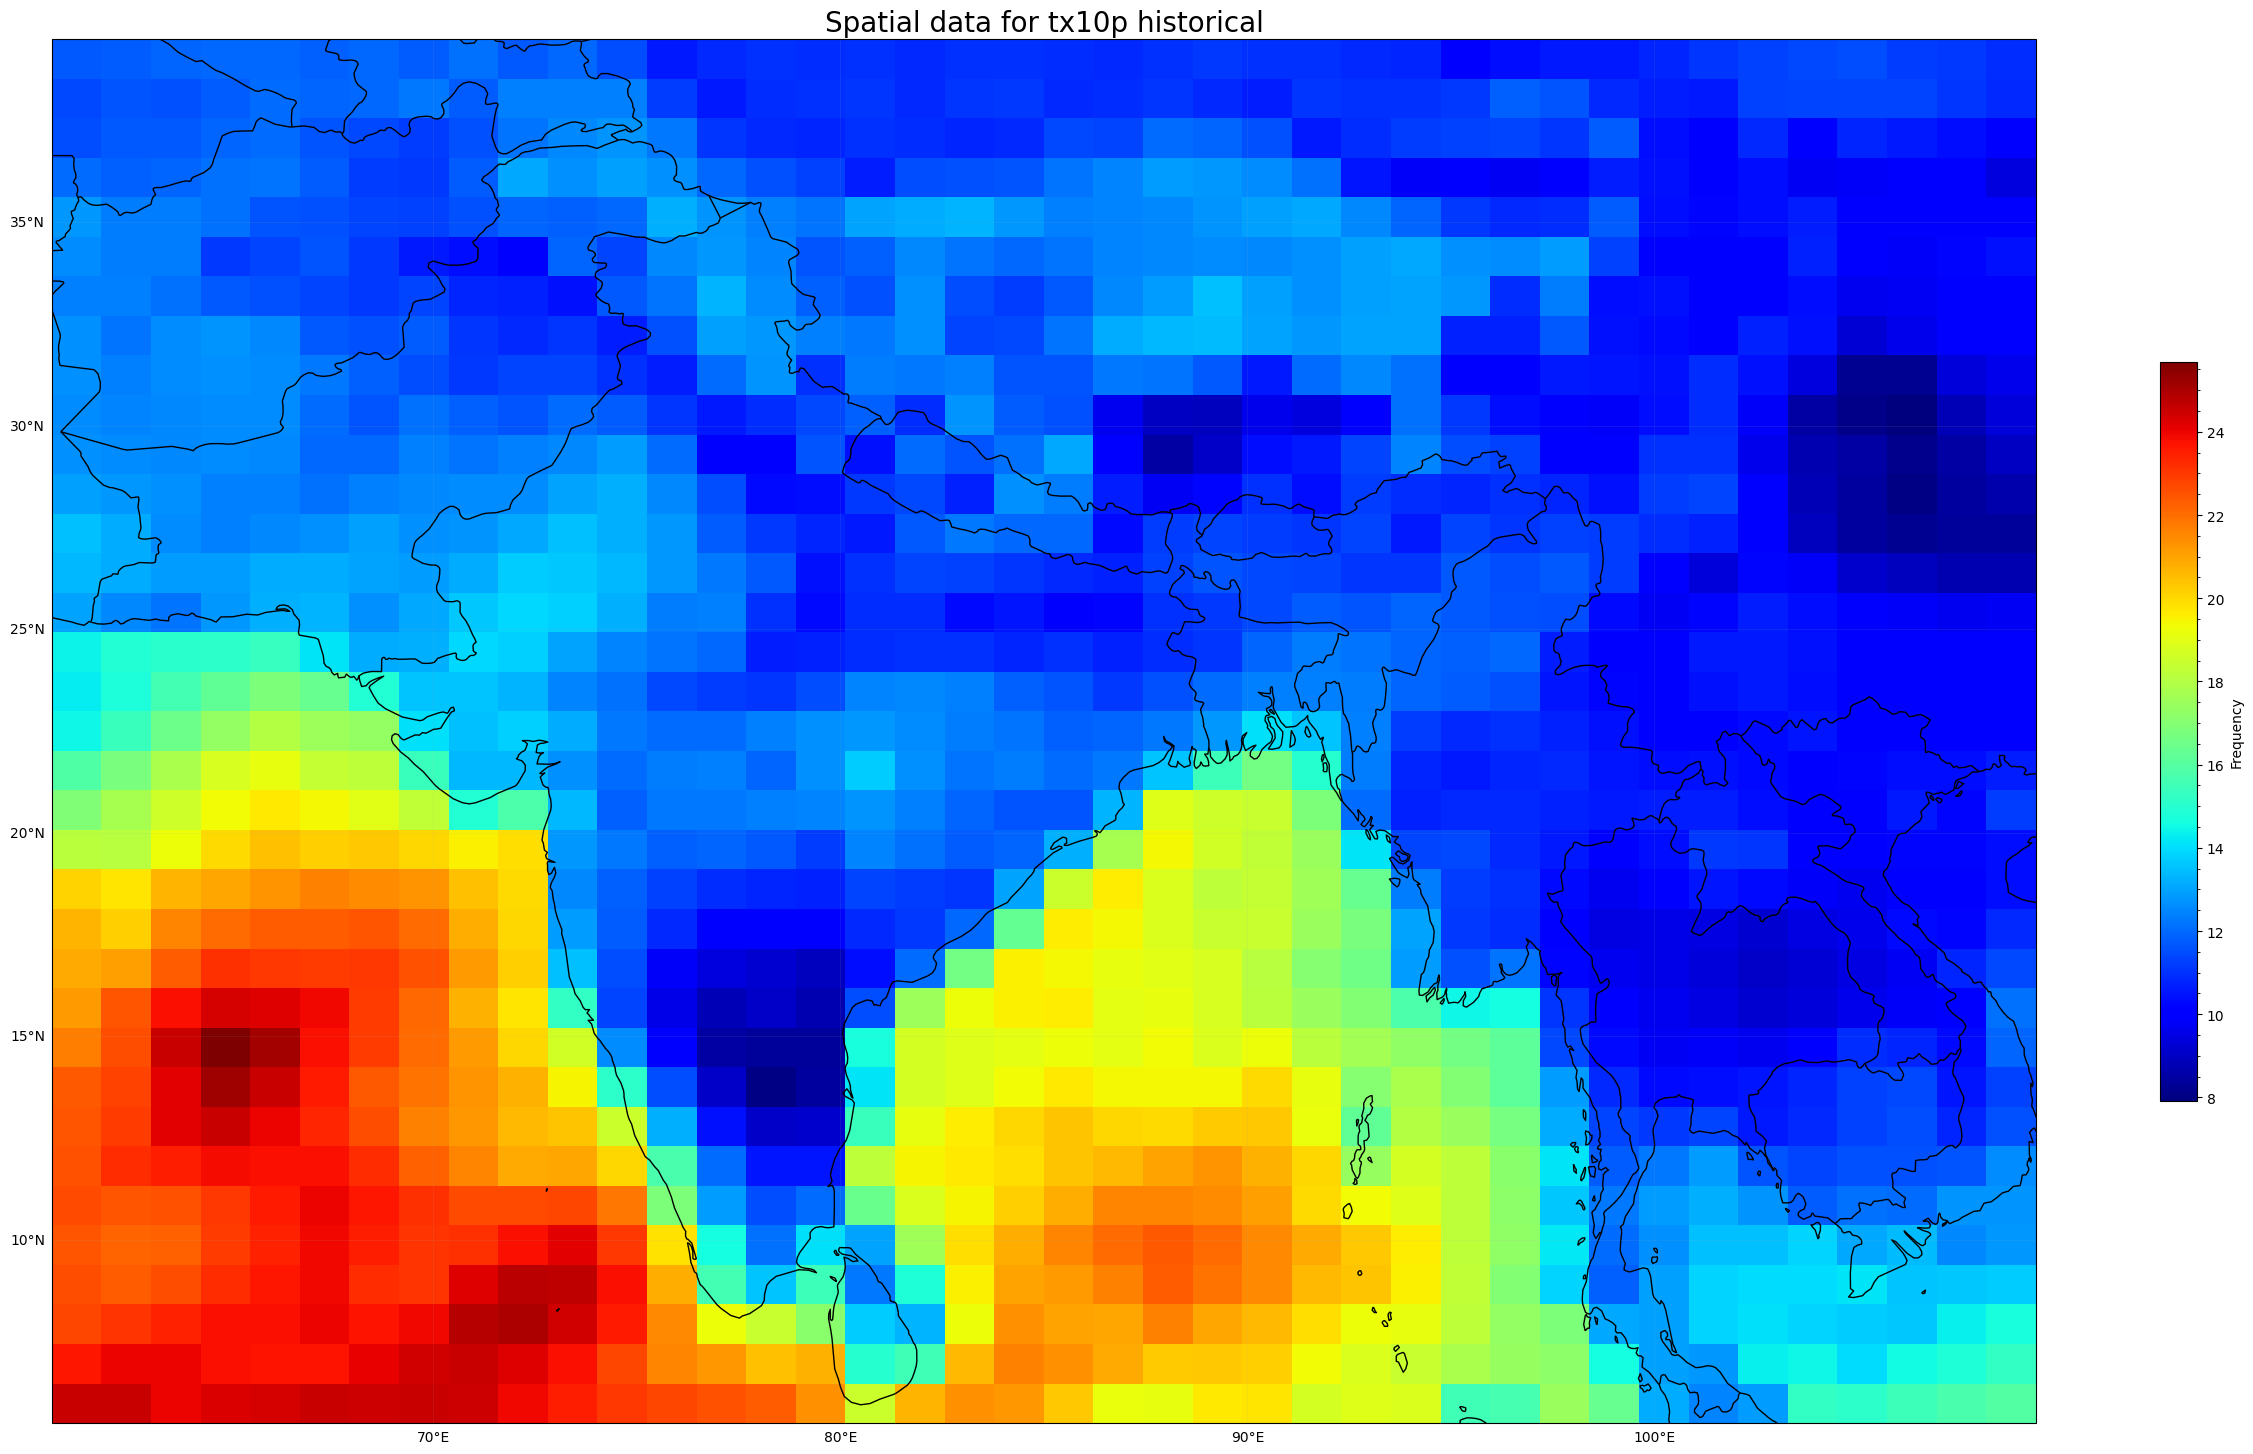

In [6]:
lat = spatial_data.lat
lon = spatial_data.lon

fig = plt.figure(figsize = (32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe = None))

mp = ax.imshow(spatial_data, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap = 'jet', origin='lower')
plt.title('Spatial data for tx10p historical', fontsize = 20)

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
# ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig('historical-spatial-climatology.png', dpi=1200, bbox_inches='tight')
plt.show()

In [9]:
## Lets try and calculate the timeseries data now 

tx10p = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.nc')
tx10p = tx10p['tx10pETCCDI']
tx10p

<xarray.DataArray 'tx10pETCCDI' (time: 165, lat: 35, lon: 40)>
[231000 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-07-02 00:00:00 ... 2014-07-02 00:00:00
  * lon      (lon) float64 60.62 61.88 63.13 64.38 ... 105.6 106.9 108.1 109.4
  * lat      (lat) float64 5.5 6.5 7.5 8.5 9.5 10.5 ... 35.5 36.5 37.5 38.5 39.5
Attributes:
    long_name:      Percentage of Days when Daily Maximum Temperature is Belo...
    units:          %
    cell_methods:   area: mean time: maximum
    cell_measures:  area: areacella
    interp_method:  conserve_order2
    original_name:  tasmax
    history:        Created by climdex.pcic 1.1.9.1 on Mon Jul  8 09:01:08 2019
    base_period:    1981-2010

In [10]:
## taking mean along the lat and lon axis so that I am only left with timeseries data 

tx10p_fldmean = tx10p.mean(dim=['lat','lon'])
tx10p_fldmean

<xarray.DataArray 'tx10pETCCDI' (time: 165)>
array([23.295694 , 14.345597 , 14.461839 , 14.234246 , 13.010371 ,
        9.634051 , 19.614872 , 17.896086 , 14.033659 , 14.139922 ,
       16.743639 , 14.627789 , 17.60313  , 21.883953 , 26.179062 ,
       16.464773 , 12.911938 , 13.679256 , 13.162232 , 16.509197 ,
       13.049118 , 14.928181 ,  9.754208 , 12.1182   , 21.109196 ,
       13.984736 , 12.223876 , 14.559688 , 14.151467 , 20.99139  ,
       23.164383 , 18.431507 , 20.51859  , 23.196869 , 31.684542 ,
       23.766535 , 17.263405 , 20.270254 , 17.66047  , 18.415264 ,
       15.252249 , 13.457728 , 12.845402 , 11.99178  , 14.172994 ,
       14.672016 , 13.558123 , 11.48728  , 18.045403 , 18.404696 ,
       16.396086 , 13.650882 , 15.604305 , 18.864775 , 17.147161 ,
       20.027985 , 18.076124 , 13.6182   , 15.550488 , 12.861448 ,
       19.16634  , 13.090215 , 12.718003 , 14.445011 , 14.7      ,
       14.813501 , 17.330137 , 16.739332 , 16.535421 , 16.215656 ,
       16.28826  , 17.258318 , 15.227985 , 12.688455 , 15.709198 ,
       13.124267 , 14.577887 , 12.949315 , 12.900979 , 16.065754 ,
       13.378864 , 13.381214 , 18.421135 , 14.415264 , 12.426614 ,
       11.40548  , 11.05088  , 12.119961 , 16.00372  , 13.185519 ,
       11.068101 , 11.787279 , 12.198043 , 15.724071 , 14.506263 ,
       11.89902  , 14.155773 , 10.9039135, 12.418786 ,  8.376712 ,
       10.470254 ,  8.997848 ,  8.721135 ,  9.630919 , 12.802153 ,
       15.345793 , 11.148727 ,  9.817417 , 13.631507 , 12.76771  ,
       13.107631 , 17.46497  , 23.06771  , 15.996282 , 21.723288 ,
       18.084345 , 19.074558 , 13.627984 , 16.481604 , 12.145792 ,
       12.802936 , 12.032877 , 10.963405 , 13.10646  , 12.116831 ,
       19.782583 ,  8.89589  , 12.979061 , 16.498434 , 10.172604 ,
       10.209785 , 16.101963 , 13.750624 , 13.155246 , 11.681577 ,
       13.066509 , 13.483757 ,  8.452885 ,  8.066388 ,  8.353316 ,
       13.319023 , 12.827309 , 18.954607 , 15.680234 , 16.774277 ,
       13.818895 ,  9.470734 ,  8.130239 ,  7.6664553,  9.679154 ,
       10.383595 ,  7.1916323,  8.6285715,  6.9665027,  7.517815 ,
        8.399062 ,  6.023881 , 11.115906 ,  6.364613 ,  8.87215  ,
        5.13756  ,  5.209198 ,  6.0906067,  5.4136987,  4.803718 ],
      dtype=float32)
Coordinates:
  * time     (time) object 1850-07-02 00:00:00 ... 2014-07-02 00:00:00

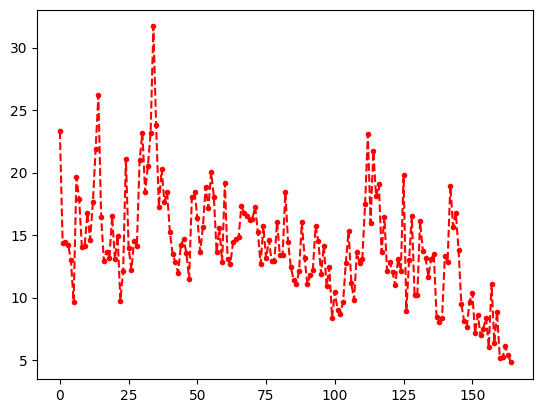

In [11]:
## plotting the timeseries and seeing what I get 
from matplotlib.dates import date2num

dates = date2num(tx10p_fldmean['time'].values)

plt.plot(tx10p_fldmean,'r.--')

/tmp/ipykernel_51967/2779861367.py:7: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tx10p_fldmean['time'] = tx10p_fldmean.indexes['time'].to_datetimeindex()


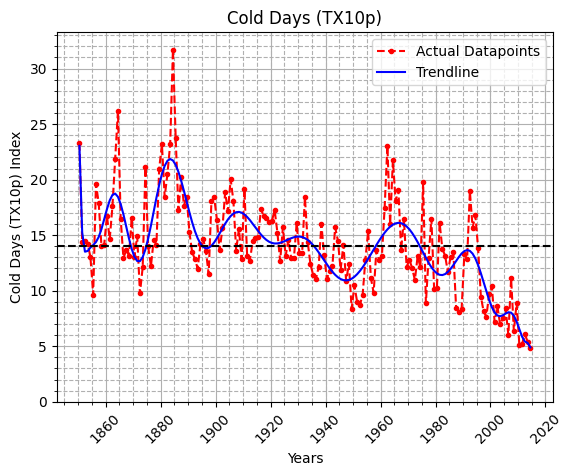

In [12]:
import pandas as pd
data_mean = tx10p_fldmean.mean().item()
data_std = tx10p_fldmean.std().item()

x = date2num(tx10p_fldmean['time'].values)

tx10p_fldmean['time'] = tx10p_fldmean.indexes['time'].to_datetimeindex()

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, tx10p_fldmean, 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = tx10p_fldmean.max()
fig, ax = plt.subplots()

ax.plot(tx10p_fldmean['time'], tx10p_fldmean, 'r.--', label='Actual Datapoints')
ax.plot(tx10p_fldmean['time'], trendline, 'b-', label='Trendline')
ax.axhline(y=data_mean, color='black', linestyle='--')
ax.bar(tx10p_fldmean['time'], [max_height]*len(tx10p_fldmean), alpha=0.3, width=1)

ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p)')
ax.legend()
# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

plt.show()




In [38]:
## trying to calculate spatial trend of each grid points 

import netCDF4
import numpy as np 
from scipy import stats


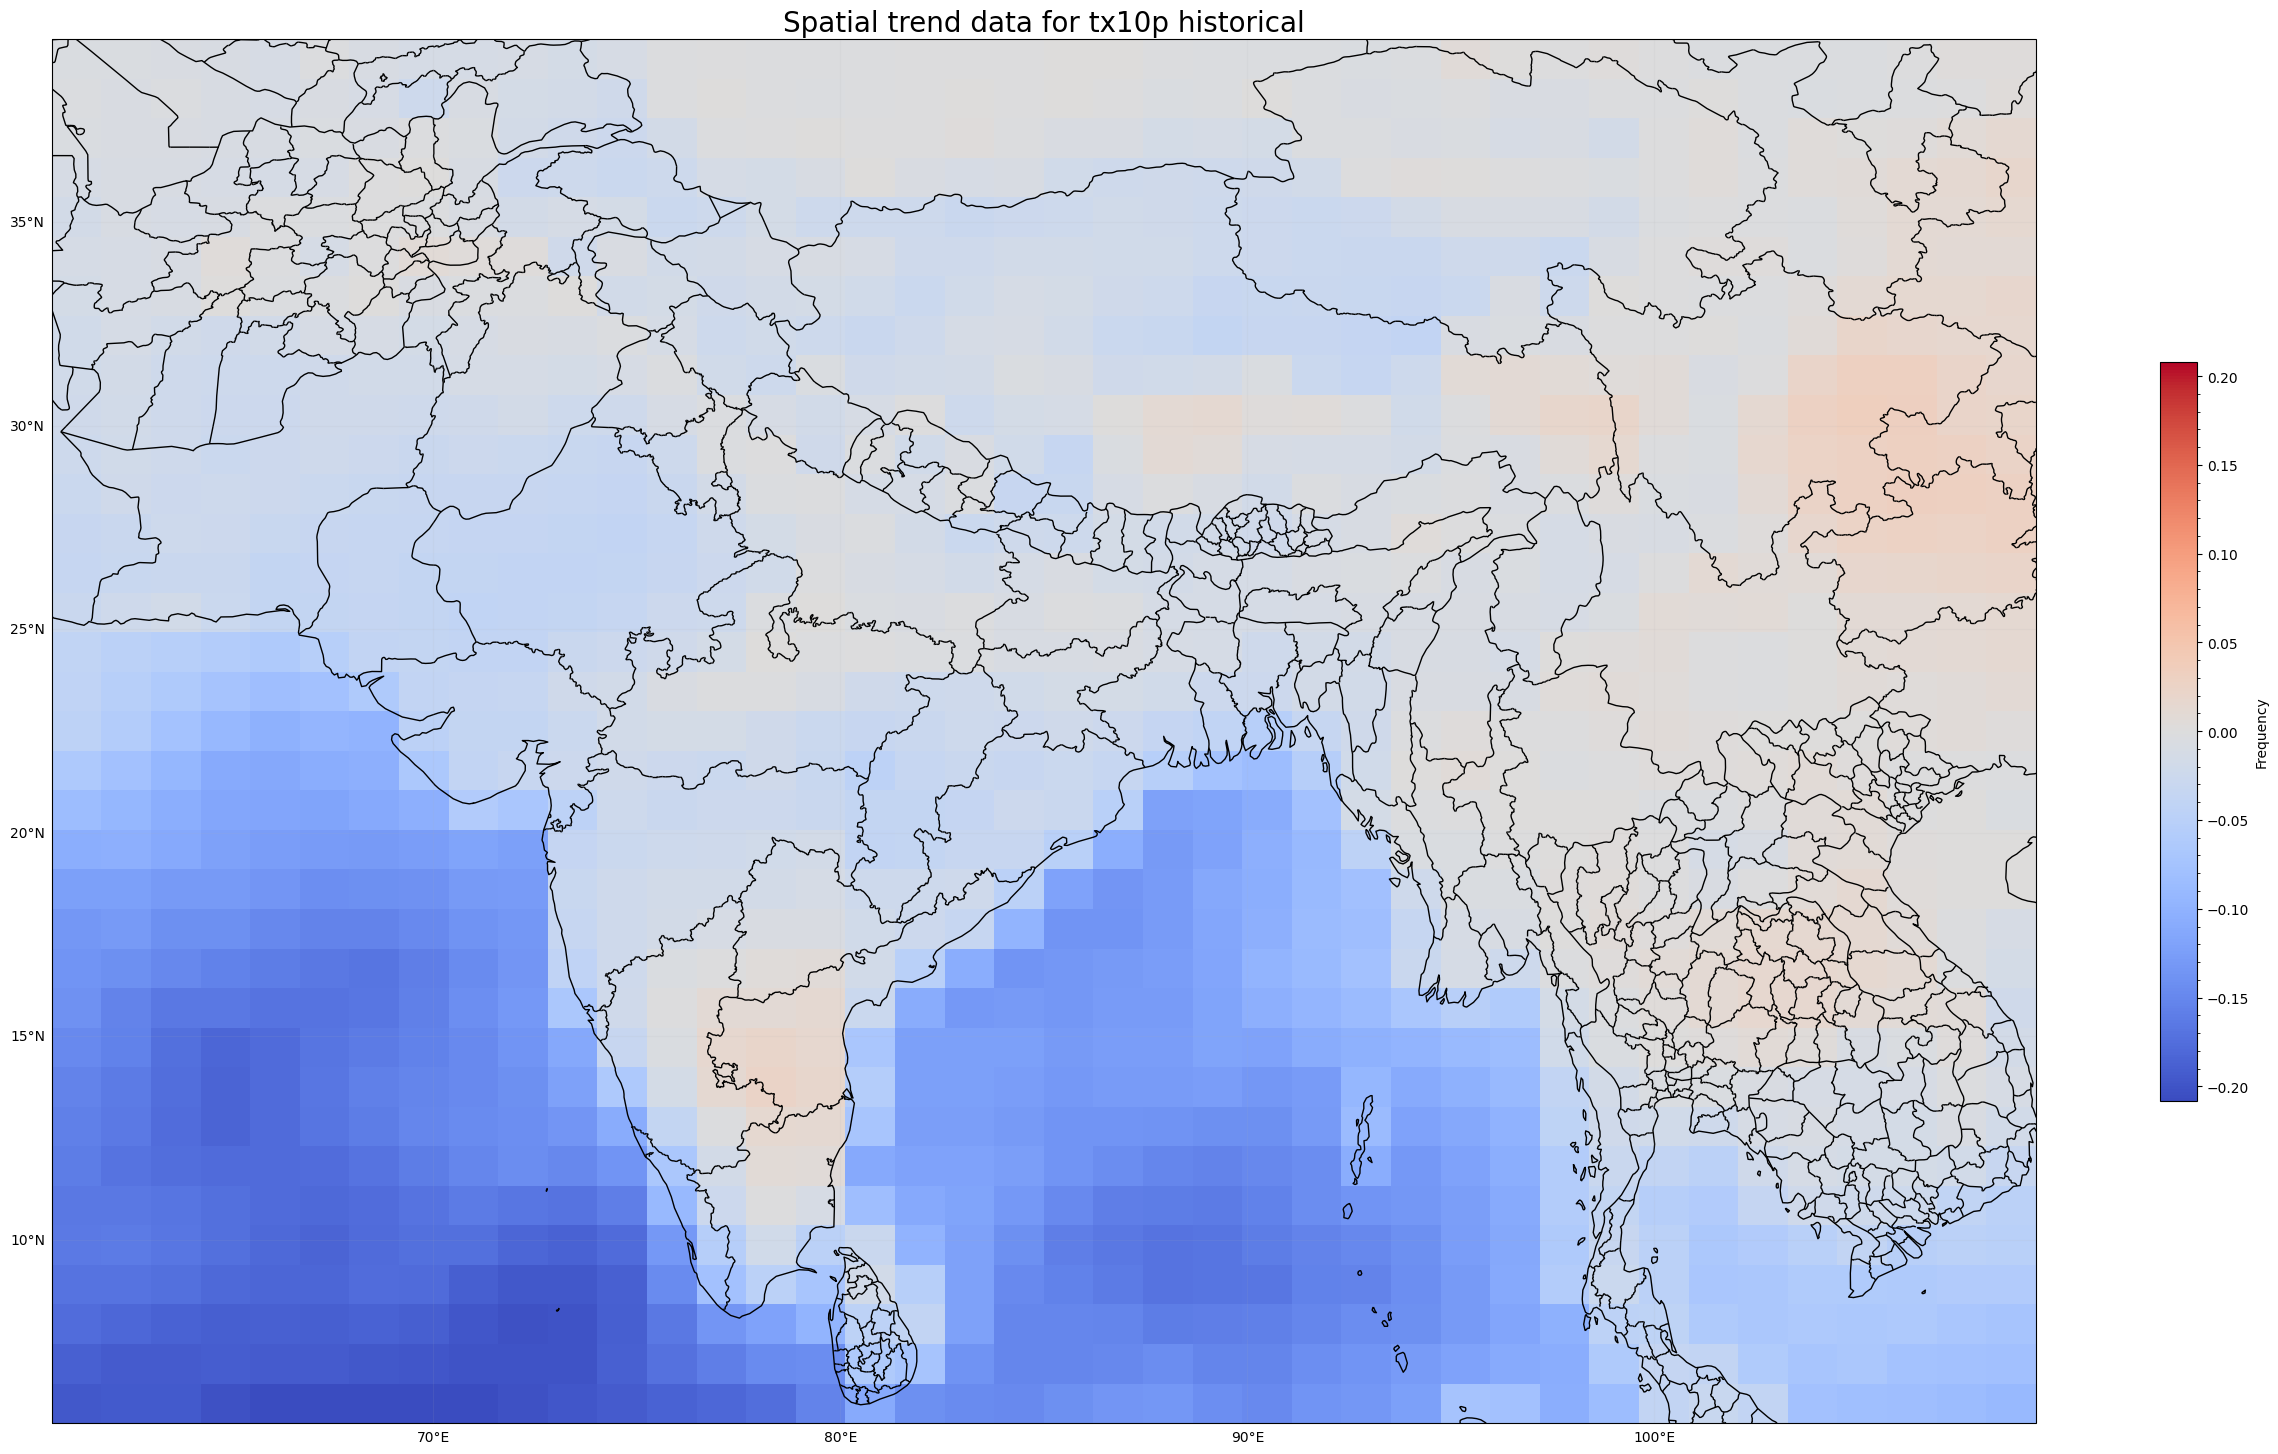

In [24]:
from matplotlib.colors import TwoSlopeNorm


nc = netCDF4.Dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.nc')

# extract the dataset for tx10pETCCDI

tx10p = nc.variables['tx10pETCCDI'][:] 

# dimensions of the data
time_dim,lat_dim,lon_dim = tx10p.shape

# arrays to store the trend and p-values
trend = np.zeros((lat_dim,lon_dim))
p_values = np.zeros((lat_dim,lon_dim))

# loop over each grid point 

for lat_idx in range(lat_dim):
    for lon_idx in range(lon_dim):
        
        # calculate data at each grid point
        data = tx10p[:,lat_idx,lon_idx]
        
        # fit a linear regression model to the data
        slope,intercept,r_value,p_value,std_error = stats.linregress(np.arange(time_dim),data)
        
        # append the slope (trend) and p-values in the arrays
        trend[lat_idx,lon_idx] = slope
        p_values[lat_idx,lon_idx] = p_value
        
# visualising the trend using a heatmap or contour 

lat = spatial_data.lat
lon = spatial_data.lon

# Normalize the colorbar
max_abs_value = np.max(np.abs(trend))
norm = TwoSlopeNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)




fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))



mp = ax.imshow(trend, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='coolwarm', origin='lower', norm=norm)

plt.title('Spatial trend data for tx10p historical', fontsize=20)

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig('historical-spatial-climatology.png', dpi=1200, bbox_inches='tight')
plt.show()


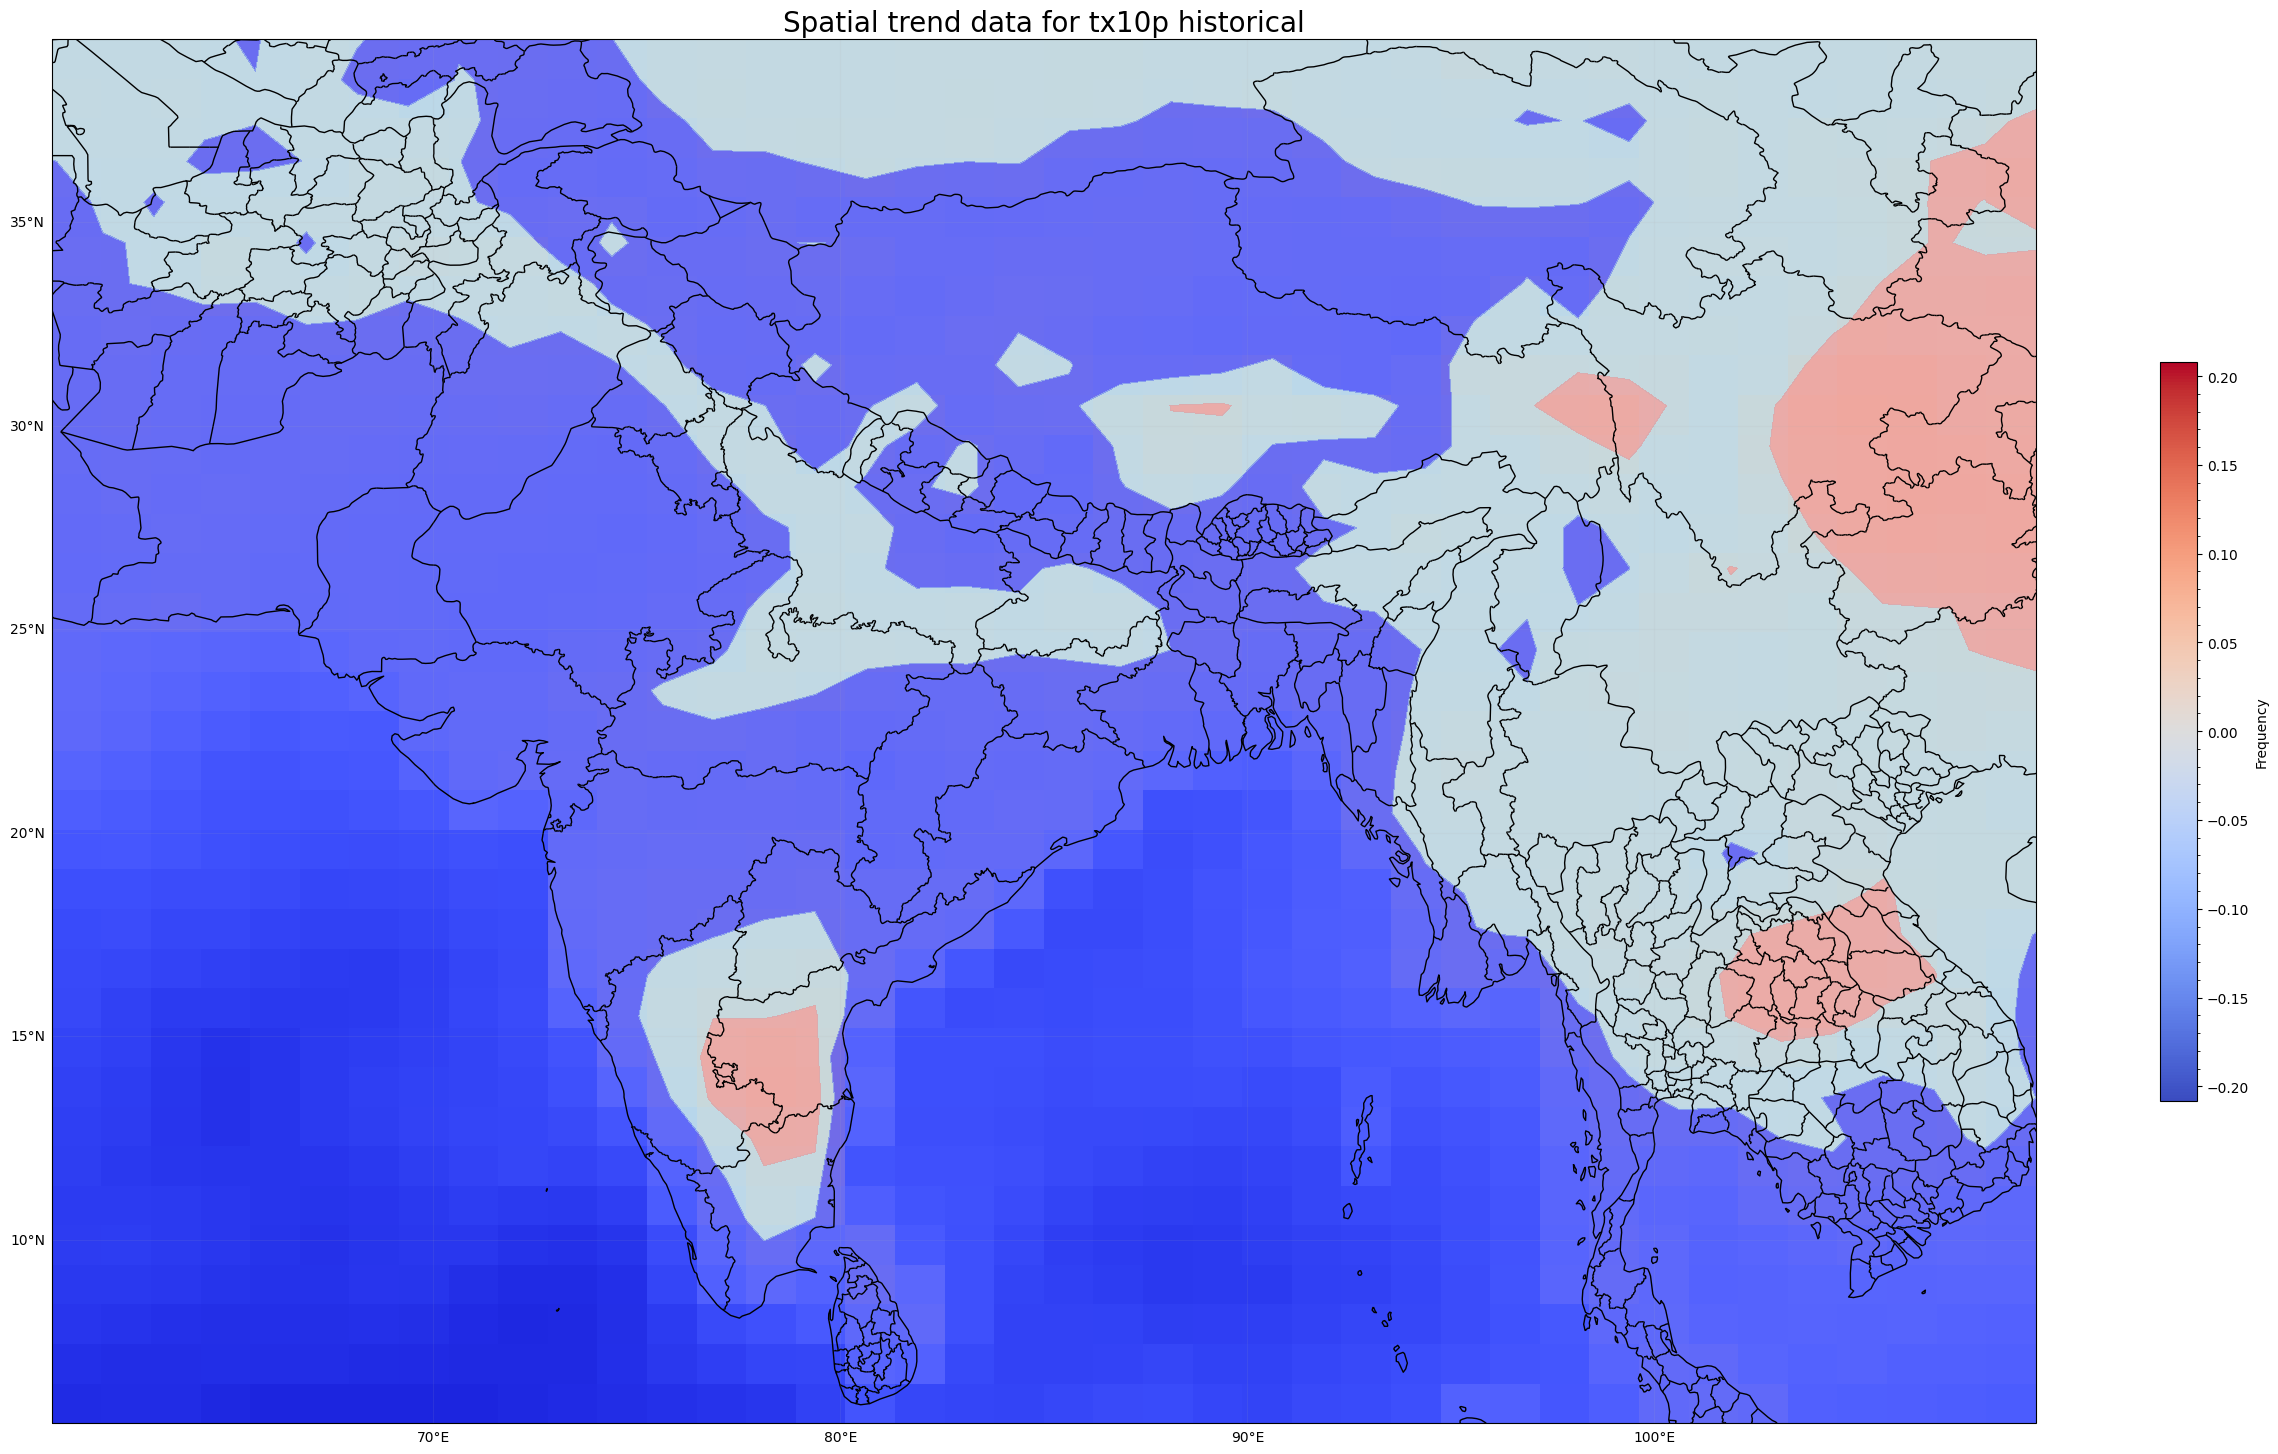

In [26]:
from matplotlib.colors import TwoSlopeNorm


nc = netCDF4.Dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.nc')

# extract the dataset for tx10pETCCDI

tx10p = nc.variables['tx10pETCCDI'][:] 

# dimensions of the data
time_dim,lat_dim,lon_dim = tx10p.shape

# arrays to store the trend and p-values
trend = np.zeros((lat_dim,lon_dim))
p_values = np.zeros((lat_dim,lon_dim))

# loop over each grid point 

for lat_idx in range(lat_dim):
    for lon_idx in range(lon_dim):
        
        # calculate data at each grid point
        data = tx10p[:,lat_idx,lon_idx]
        
        # fit a linear regression model to the data
        slope,intercept,r_value,p_value,std_error = stats.linregress(np.arange(time_dim),data)
        
        # append the slope (trend) and p-values in the arrays
        trend[lat_idx,lon_idx] = slope
        p_values[lat_idx,lon_idx] = p_value
        
# visualising the trend using a heatmap or contour 

lat = spatial_data.lat
lon = spatial_data.lon

# Normalize the colorbar
max_abs_value = np.max(np.abs(trend))
norm = TwoSlopeNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)




# ... (previous code remains unchanged)

fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(trend, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='coolwarm', origin='lower', norm=norm)

# Draw filled contour plots to highlight positive and negative trends
contour_level = 0.01  # Adjust this value to change the distance between contour lines
contours = ax.contourf(lon, lat, trend, levels=[-max_abs_value, -contour_level, contour_level, max_abs_value], colors=['blue', 'lightblue', 'lightcoral', 'red'], alpha=0.5, transform=ccrs.PlateCarree())

plt.title('Spatial trend data for tx10p historical', fontsize=20)

# ... (rest of the code remains unchanged)



states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig('historical-spatial-climatology.png', dpi=1200, bbox_inches='tight')
plt.show()


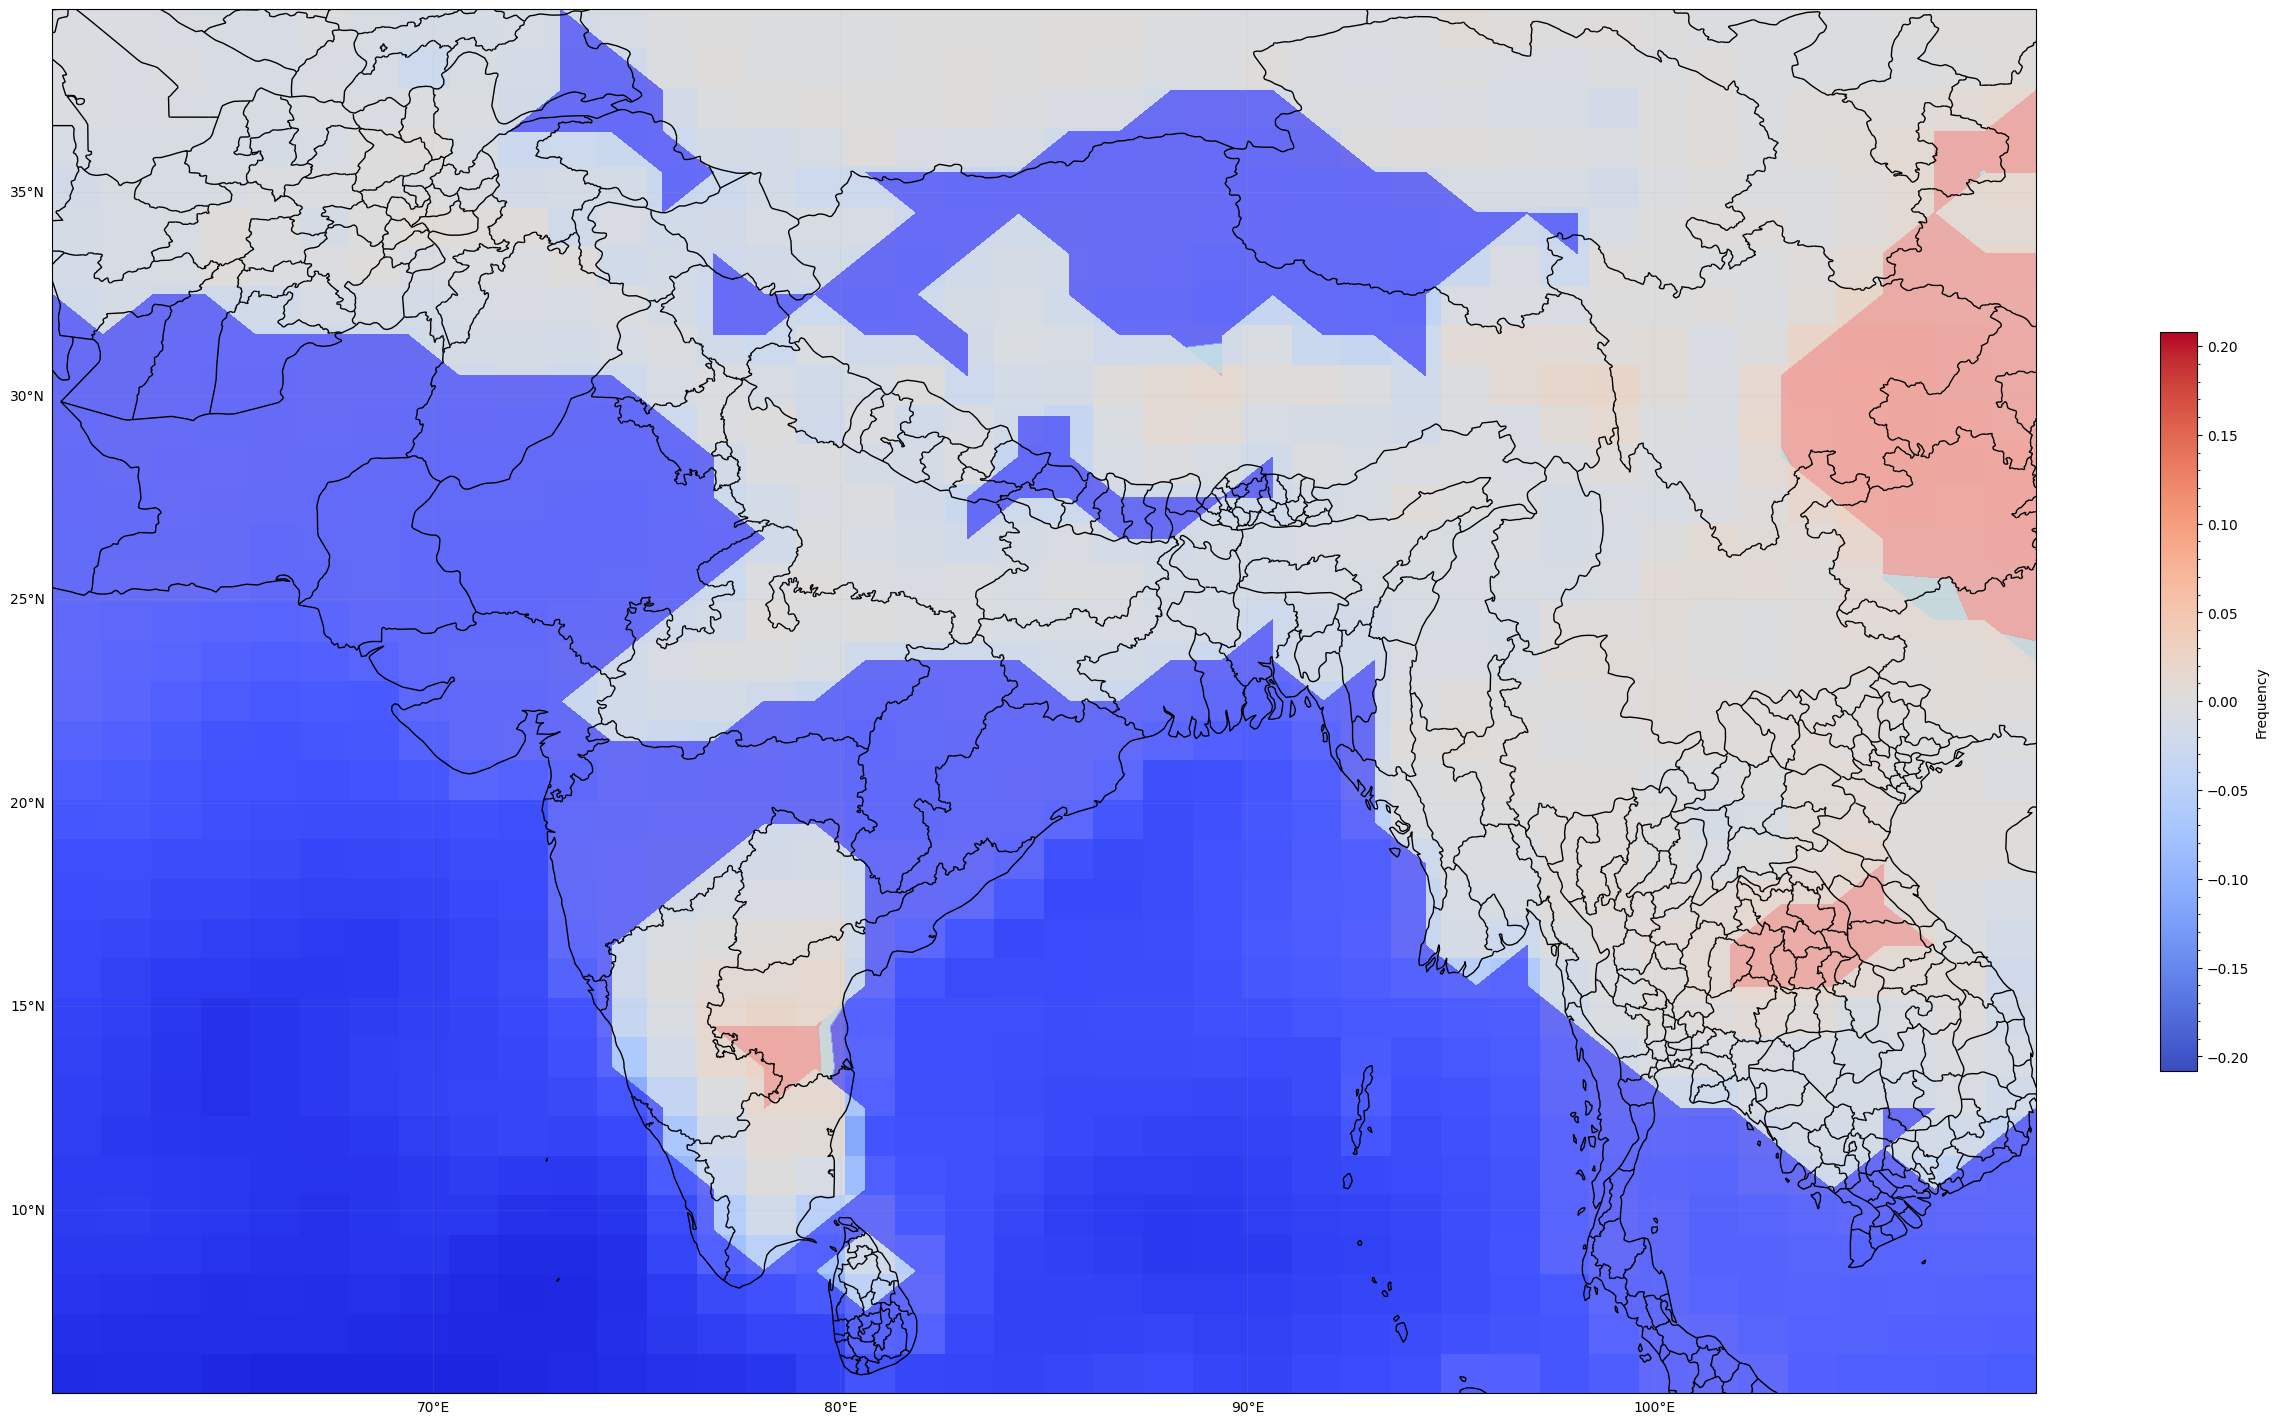

In [52]:
from matplotlib.colors import TwoSlopeNorm


nc = netCDF4.Dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.nc')

# extract the dataset for tx10pETCCDI

tx10p = nc.variables['tx10pETCCDI'][:] 

# dimensions of the data
time_dim,lat_dim,lon_dim = tx10p.shape

# arrays to store the trend and p-values
trend = np.zeros((lat_dim,lon_dim))
p_values = np.zeros((lat_dim,lon_dim))

# loop over each grid point 

for lat_idx in range(lat_dim):
    for lon_idx in range(lon_dim):
        
        # calculate data at each grid point
        data = tx10p[:,lat_idx,lon_idx]
        
        # fit a linear regression model to the data
        slope,intercept,r_value,p_value,std_error = stats.linregress(np.arange(time_dim),data)
        
        # append the slope (trend) and p-values in the arrays
        trend[lat_idx,lon_idx] = slope
        p_values[lat_idx,lon_idx] = p_value
        
# visualising the trend using a heatmap or contour 

lat = spatial_data.lat
lon = spatial_data.lon

# Normalize the colorbar
max_abs_value = np.max(np.abs(trend))
norm = TwoSlopeNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)




# ... (previous code remains unchanged)

# Create a mask for p-values below the threshold
p_value_threshold = 0.05
significant = p_values < p_value_threshold

# Apply the mask to the trend data
masked_trend = np.ma.array(trend, mask=np.logical_not(significant))

# ... (rest of the code remains unchanged)

fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(trend, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='coolwarm', origin='lower', norm=norm)

# Draw filled contour plots to highlight significant positive and negative trends
contours = ax.contourf(lon, lat, masked_trend, levels=[-max_abs_value, -contour_level, contour_level, max_abs_value], colors=['blue', 'lightblue', 'lightcoral', 'red'], alpha=0.5, transform=ccrs.PlateCarree())

# ... (rest of the code remains unchanged)



states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig('historical-spatial-climatology.png', dpi=1200, bbox_inches='tight')
plt.show()


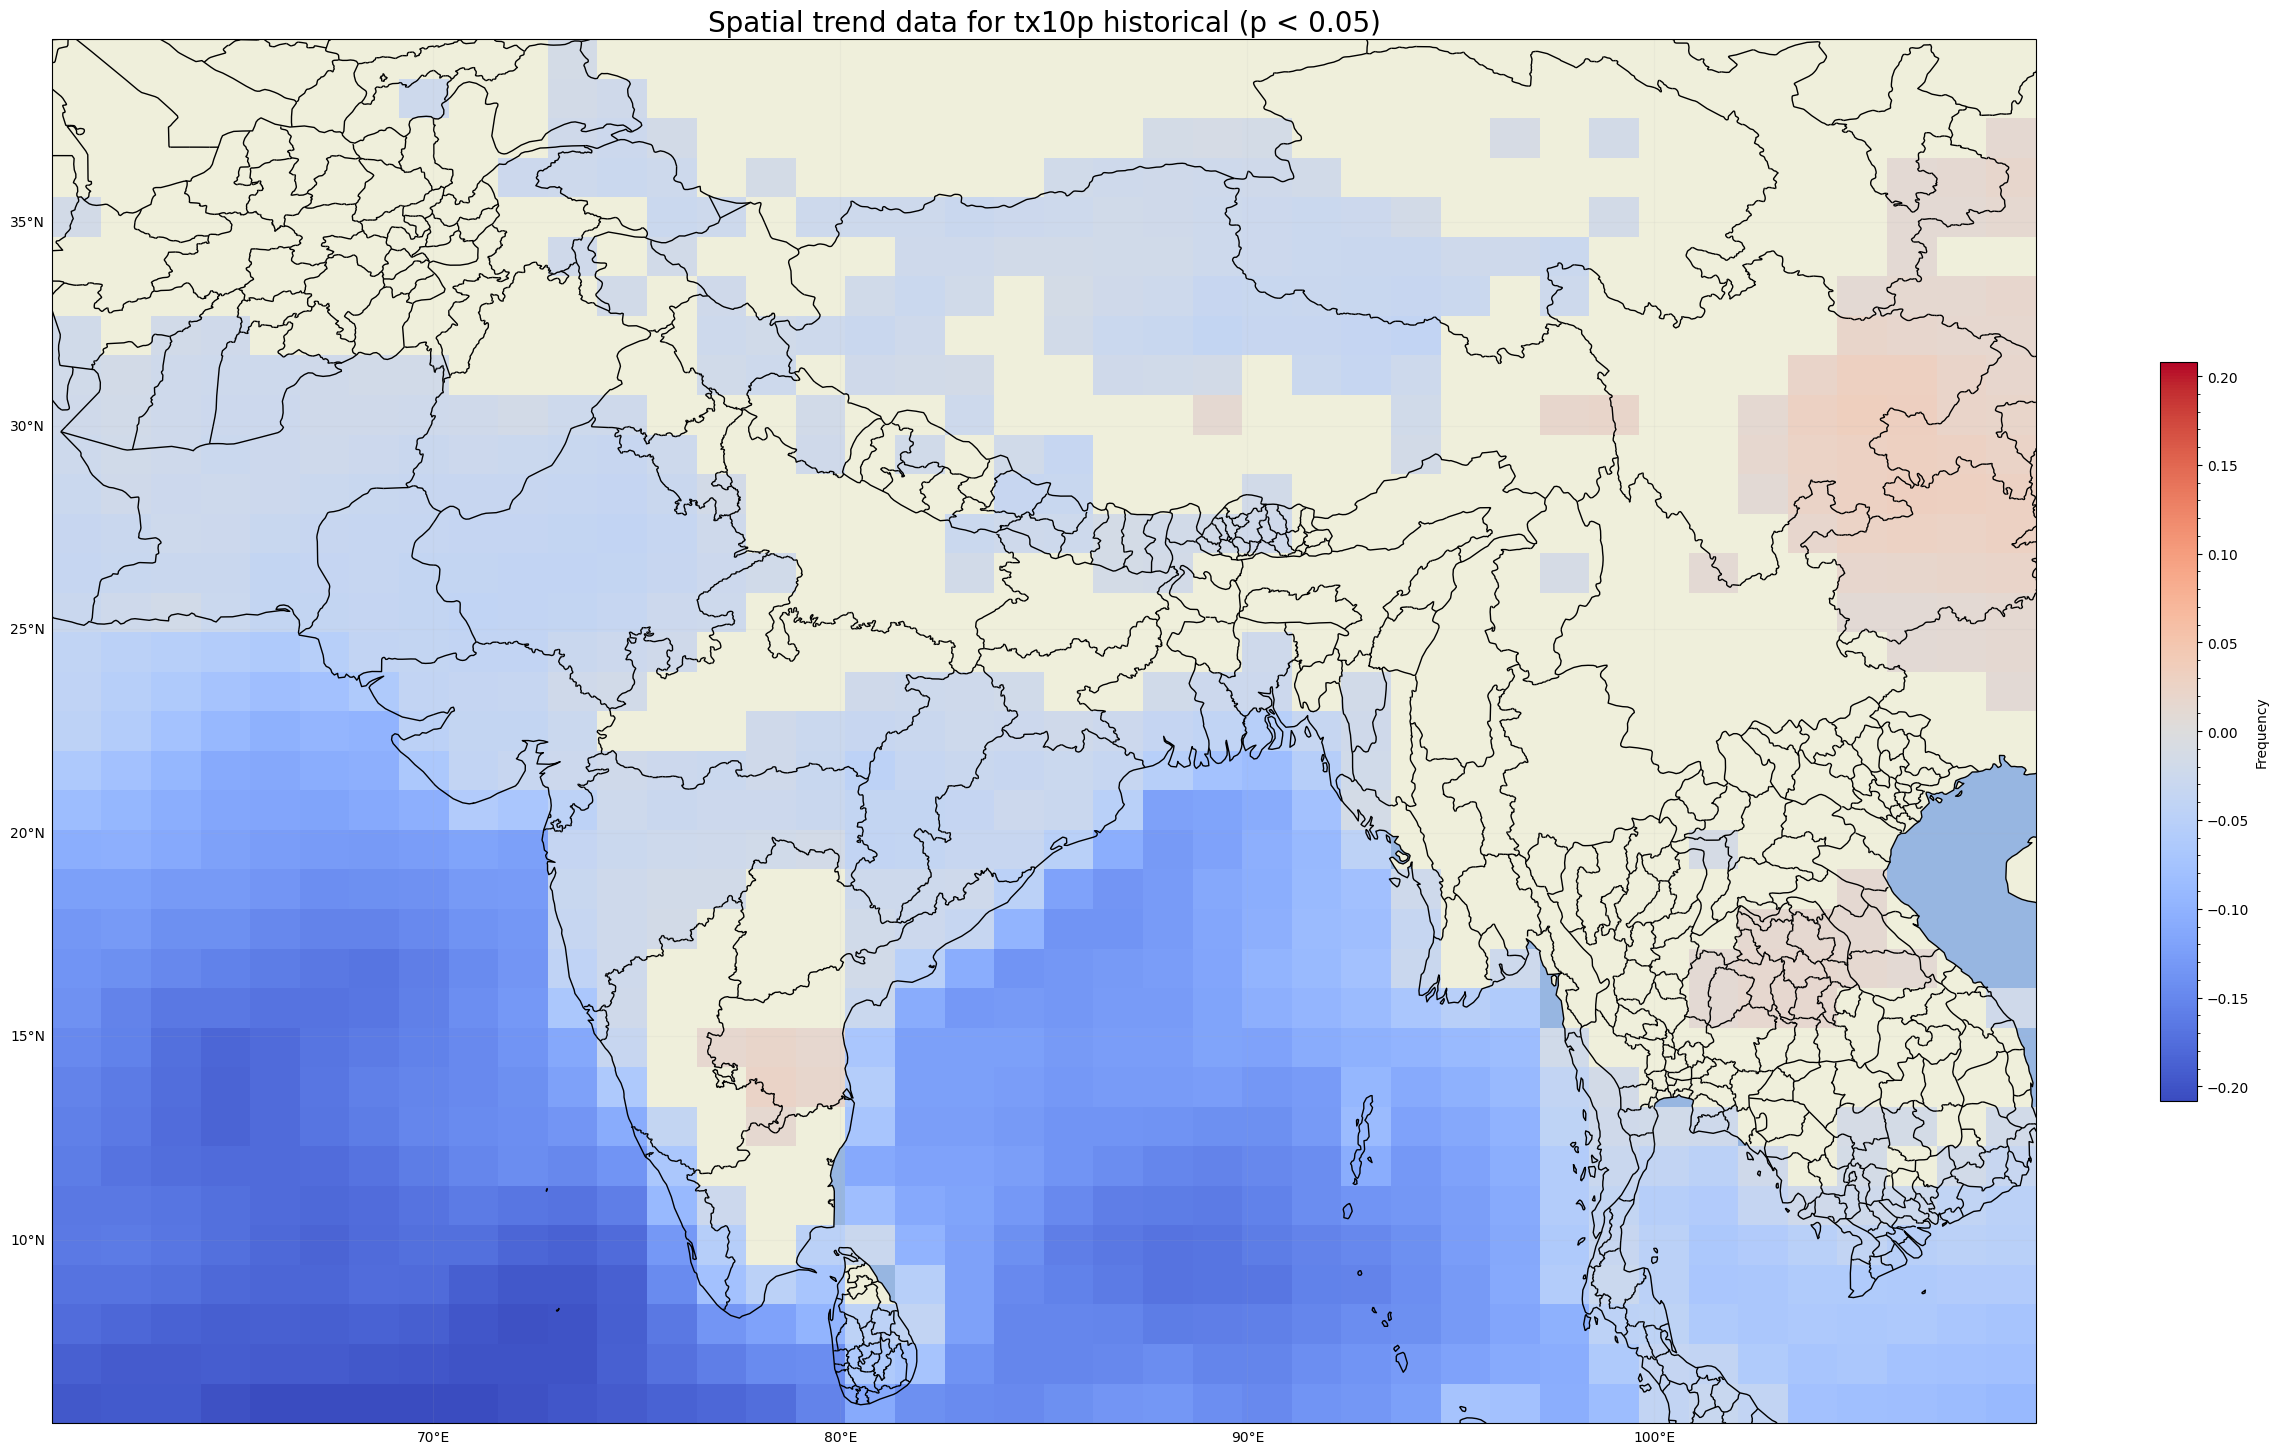

In [30]:
from matplotlib.colors import TwoSlopeNorm


nc = netCDF4.Dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.nc')

# extract the dataset for tx10pETCCDI

tx10p = nc.variables['tx10pETCCDI'][:] 

# dimensions of the data
time_dim,lat_dim,lon_dim = tx10p.shape

# arrays to store the trend and p-values
trend = np.zeros((lat_dim,lon_dim))
p_values = np.zeros((lat_dim,lon_dim))

# loop over each grid point 

for lat_idx in range(lat_dim):
    for lon_idx in range(lon_dim):
        
        # calculate data at each grid point
        data = tx10p[:,lat_idx,lon_idx]
        
        # fit a linear regression model to the data
        slope,intercept,r_value,p_value,std_error = stats.linregress(np.arange(time_dim),data)
        
        # append the slope (trend) and p-values in the arrays
        trend[lat_idx,lon_idx] = slope
        p_values[lat_idx,lon_idx] = p_value
        
# visualising the trend using a heatmap or contour 

lat = spatial_data.lat
lon = spatial_data.lon

# Normalize the colorbar
max_abs_value = np.max(np.abs(trend))
norm = TwoSlopeNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)




# ... (previous code remains unchanged)

# Create a mask for p-values below the threshold
p_value_threshold = 0.05
significant = p_values < p_value_threshold

# Apply the mask to the trend data
masked_trend = np.ma.array(trend, mask=np.logical_not(significant))

fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

# Display the masked trend data
mp = ax.imshow(masked_trend, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='coolwarm', origin='lower', norm=norm)

# ... (rest of the code remains unchanged)

plt.title('Spatial trend data for tx10p historical (p < 0.05)', fontsize=20)

# ... (rest of the code remains unchanged)


states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig('historical-spatial-climatology.png', dpi=1200, bbox_inches='tight')
plt.show()


### Final structured pipeline for each question

#### Spatial plot of climatology of tx10p climate index for the historical period (1851-2014) over (60E-100E, 5-40N)
 

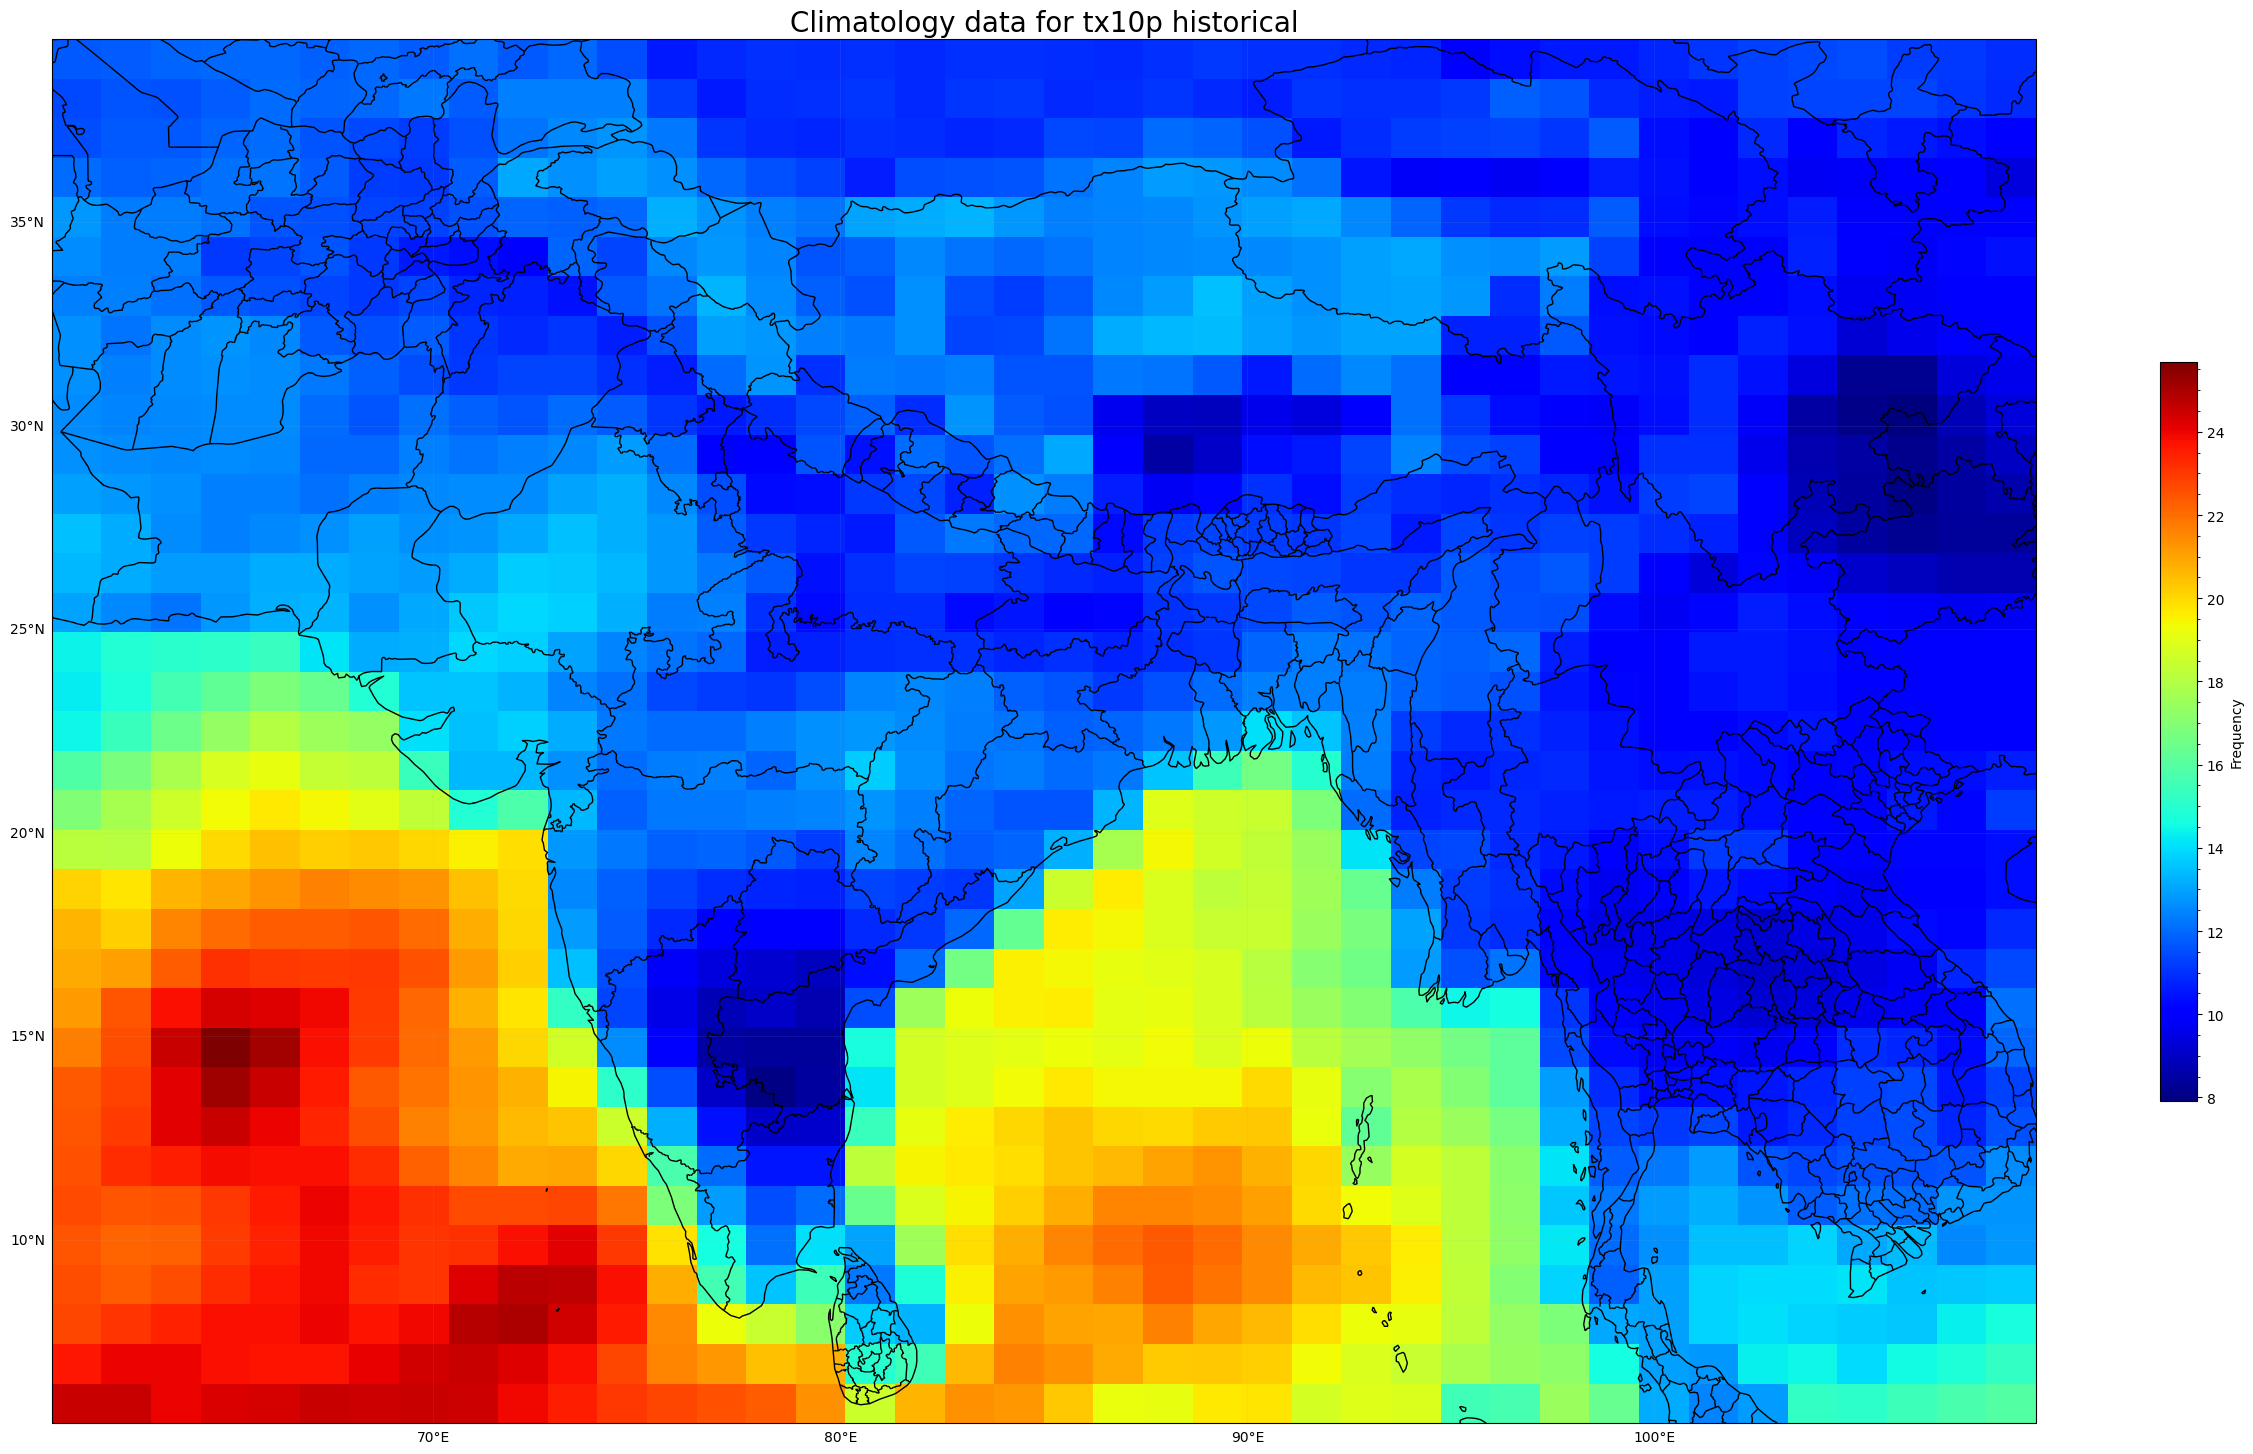

In [35]:
## climatology spatial plot 

# importing the important libraries 

import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# reading the data

spatial_data = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.timmean.nc')
spatial_data = spatial_data['tx10pETCCDI']
spatial_data = spatial_data.squeeze()

# plotting the data
lat = spatial_data.lat
lon = spatial_data.lon

fig = plt.figure(figsize = (32,32))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe = None))

mp = ax.imshow(spatial_data, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap = 'jet', origin='lower')
plt.title('Climatology data for tx10p historical', fontsize = 20)

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

plt.savefig('/home/shiv/Documents/GitHub/EES405/assignment_4/plots/tx10p-historical-spatial-climatology.png', dpi=1200, bbox_inches='tight')
plt.show()


#### Spatial trend of tx10p index data for the historical period (1850-2014) for the same region 

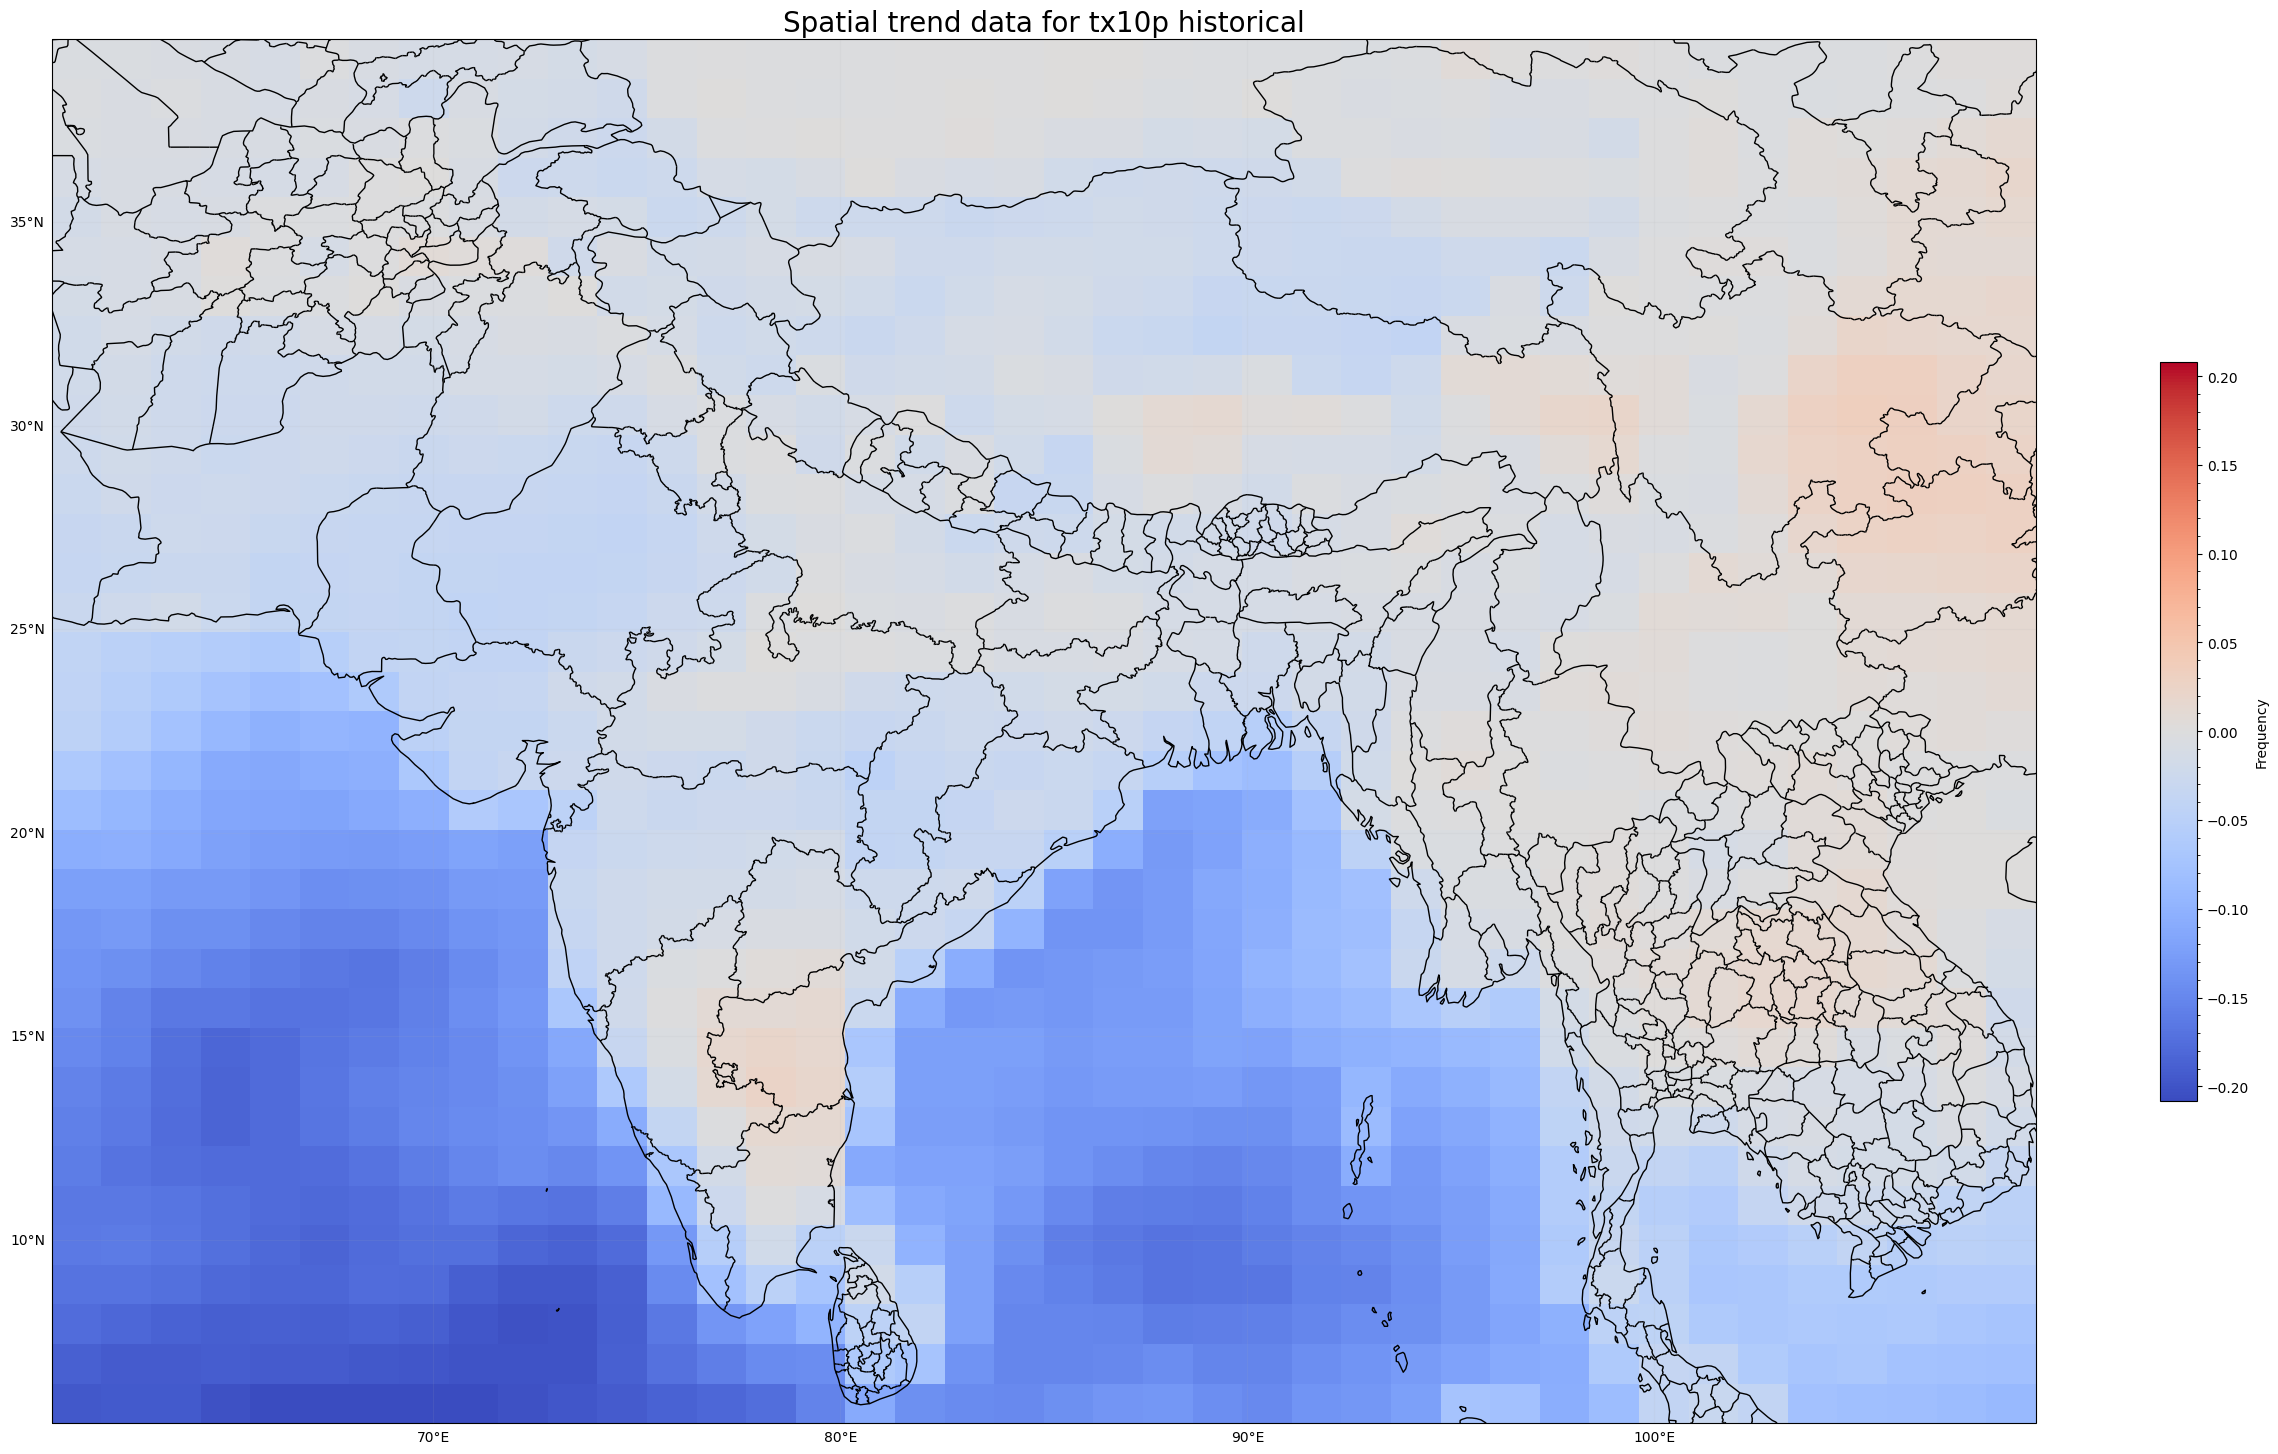

In [47]:
from matplotlib.colors import TwoSlopeNorm


nc = netCDF4.Dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.nc')

# extract the dataset for tx10pETCCDI

tx10p = nc.variables['tx10pETCCDI'][:] 

# dimensions of the data
time_dim,lat_dim,lon_dim = tx10p.shape

# arrays to store the trend and p-values
trend = np.zeros((lat_dim,lon_dim))
p_values = np.zeros((lat_dim,lon_dim))

# loop over each grid point 

for lat_idx in range(lat_dim):
    for lon_idx in range(lon_dim):
        
        # calculate data at each grid point
        data = tx10p[:,lat_idx,lon_idx]
        
        # fit a linear regression model to the data
        slope,intercept,r_value,p_value,std_error = stats.linregress(np.arange(time_dim),data)
        
        # append the slope (trend) and p-values in the arrays
        trend[lat_idx,lon_idx] = slope
        p_values[lat_idx,lon_idx] = p_value
        
# visualising the trend using a heatmap or contour 

lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]


# Normalize the colorbar
max_abs_value = np.max(np.abs(trend))
norm = TwoSlopeNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)




fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))



mp = ax.imshow(trend, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='coolwarm', origin='lower', norm=norm)

plt.title('Spatial trend data for tx10p historical', fontsize=20)

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig('historical-spatial-climatology.png', dpi=1200, bbox_inches='tight')
plt.show()


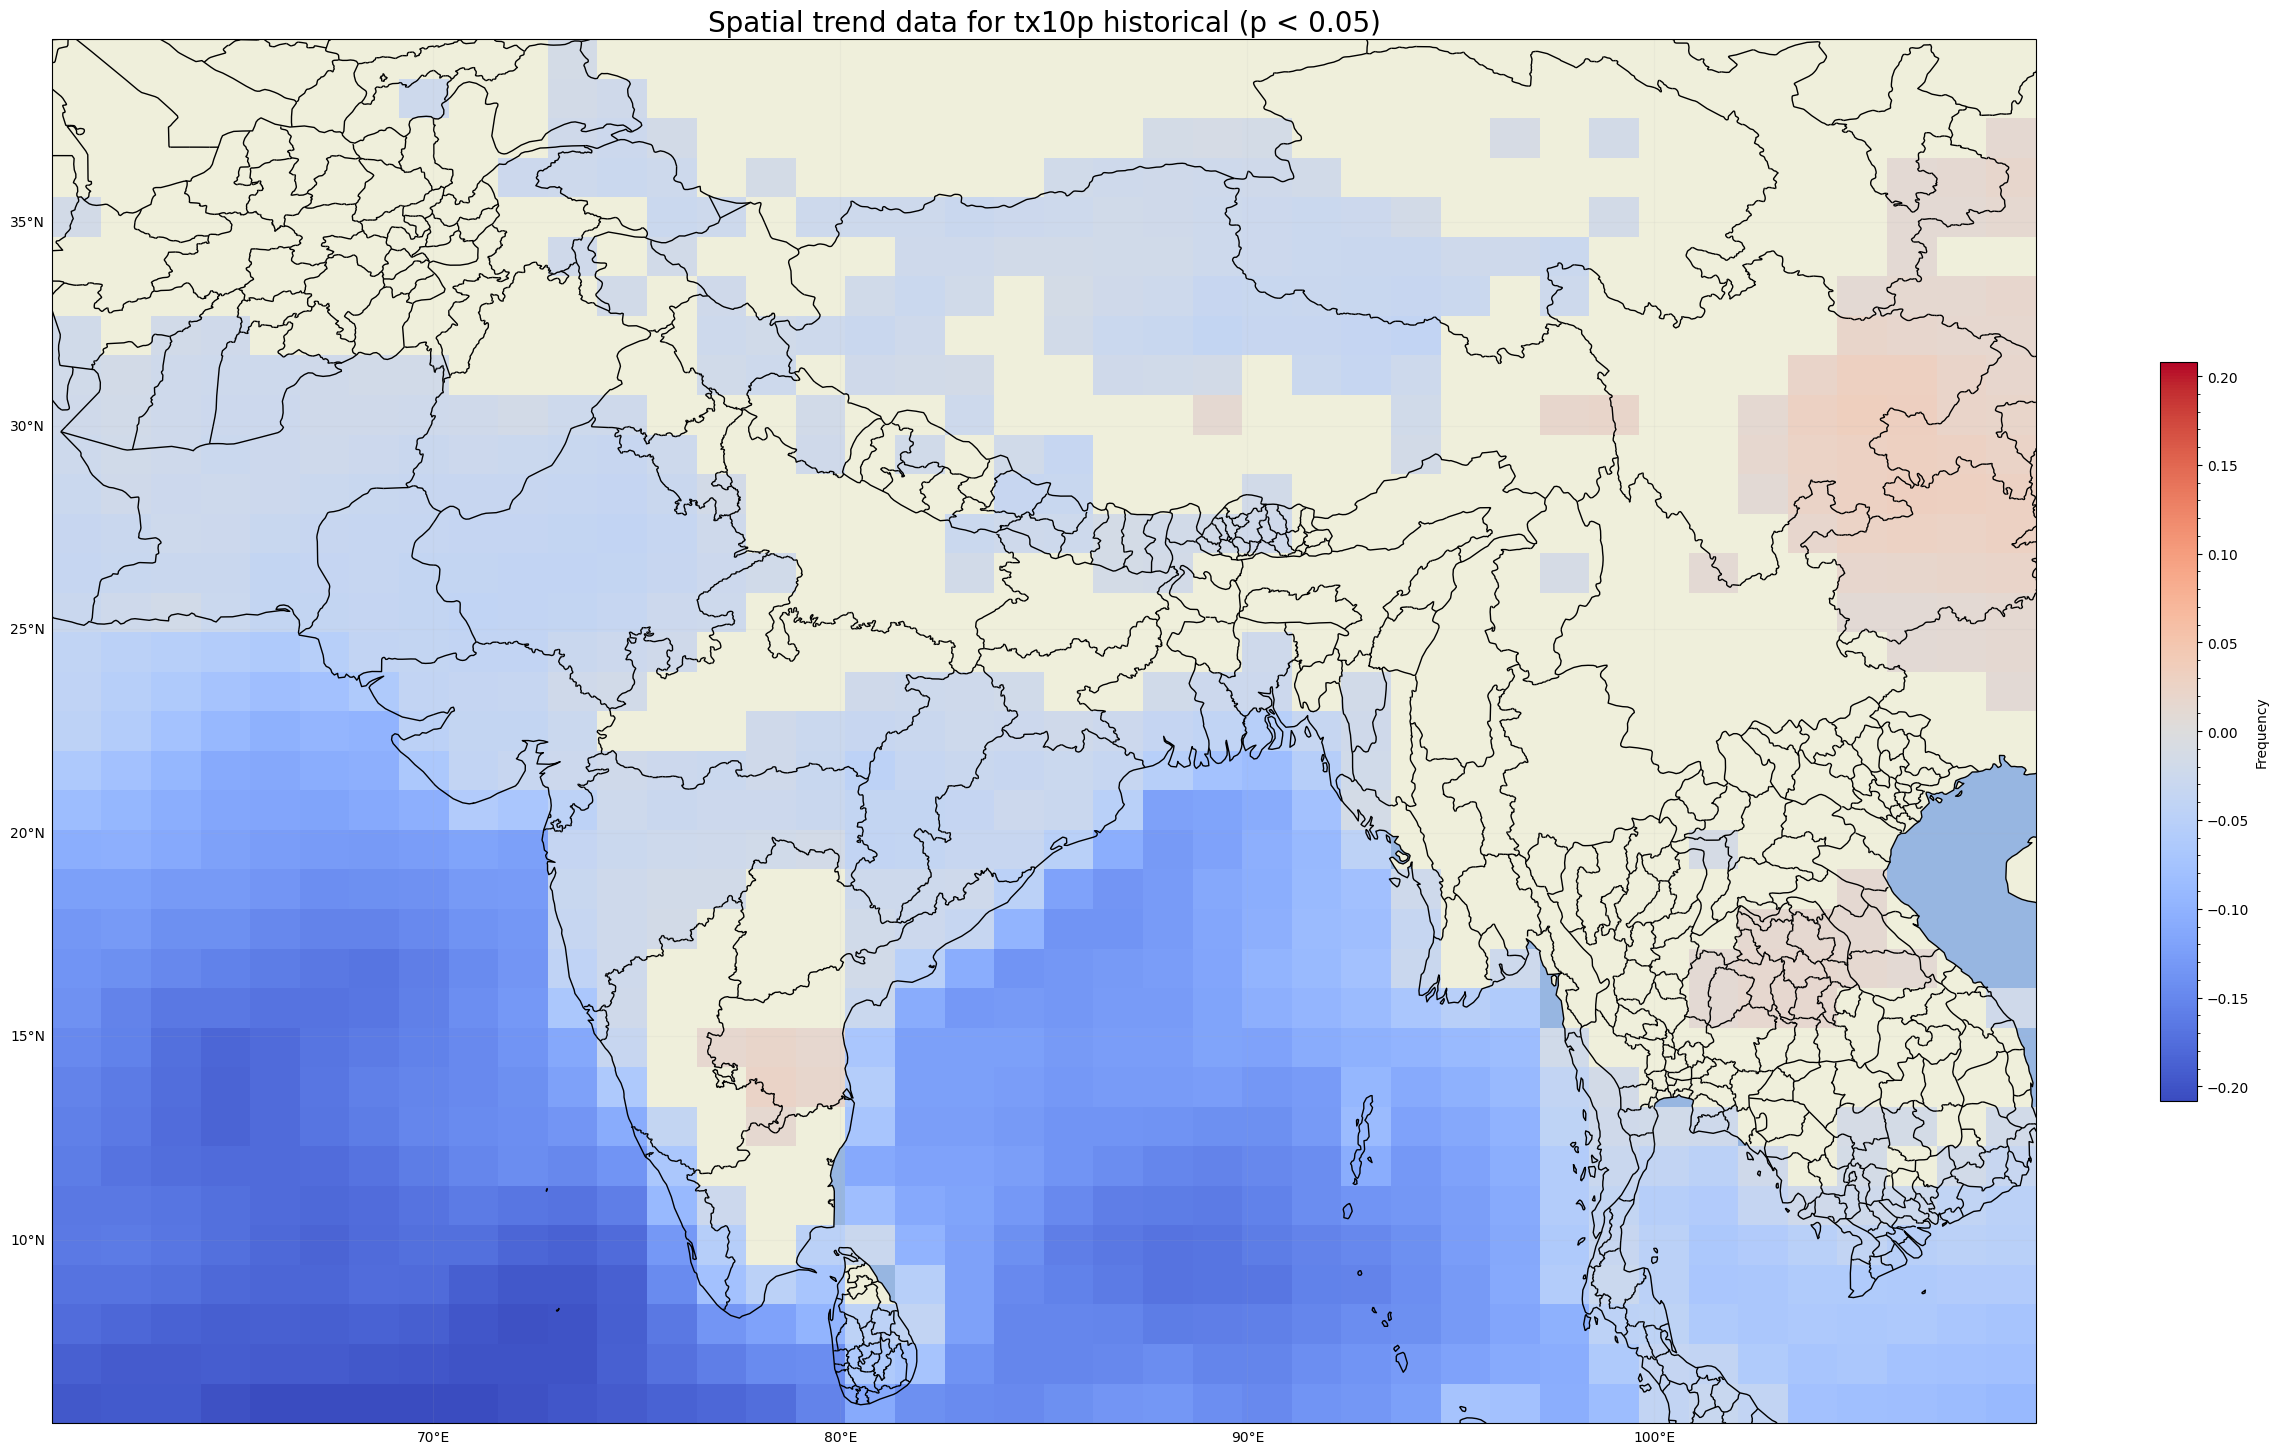

In [46]:
from matplotlib.colors import TwoSlopeNorm


nc = netCDF4.Dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.india.nc')

# extract the dataset for tx10pETCCDI

tx10p = nc.variables['tx10pETCCDI'][:] 

# dimensions of the data
time_dim,lat_dim,lon_dim = tx10p.shape

# arrays to store the trend and p-values
trend = np.zeros((lat_dim,lon_dim))
p_values = np.zeros((lat_dim,lon_dim))

# loop over each grid point 

for lat_idx in range(lat_dim):
    for lon_idx in range(lon_dim):
        
        # calculate data at each grid point
        data = tx10p[:,lat_idx,lon_idx]
        
        # fit a linear regression model to the data
        slope,intercept,r_value,p_value,std_error = stats.linregress(np.arange(time_dim),data)
        
        # append the slope (trend) and p-values in the arrays
        trend[lat_idx,lon_idx] = slope
        p_values[lat_idx,lon_idx] = p_value
        
# visualising the trend using a heatmap or contour 

lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]


# Normalize the colorbar
max_abs_value = np.max(np.abs(trend))
norm = TwoSlopeNorm(vmin=-max_abs_value, vcenter=0, vmax=max_abs_value)



# Create a mask for p-values below the threshold
p_value_threshold = 0.05
significant = p_values < p_value_threshold

# Apply the mask to the trend data
masked_trend = np.ma.array(trend, mask=np.logical_not(significant))

fig = plt.figure(figsize=(32, 32))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

# Display the masked trend data
mp = ax.imshow(masked_trend, extent=(lon.min(), lon.max(), lat.min(), lat.max()), cmap='coolwarm', origin='lower', norm=norm)


plt.title('Spatial trend data for tx10p historical (p < 0.05)', fontsize=20)



states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)


cbar = fig.colorbar(mp, shrink=0.3,label='Frequency')
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.1)
gl.top_labels = False
gl.right_labels = False

# plt.savefig('historical-spatial-climatology.png', dpi=1200, bbox_inches='tight')
plt.show()


#### Timeseries for various regions of India 

/tmp/ipykernel_51967/598258229.py:18: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tx10p_north_india_fldmean['time'] = tx10p_north_india_fldmean.indexes['time'].to_datetimeindex()


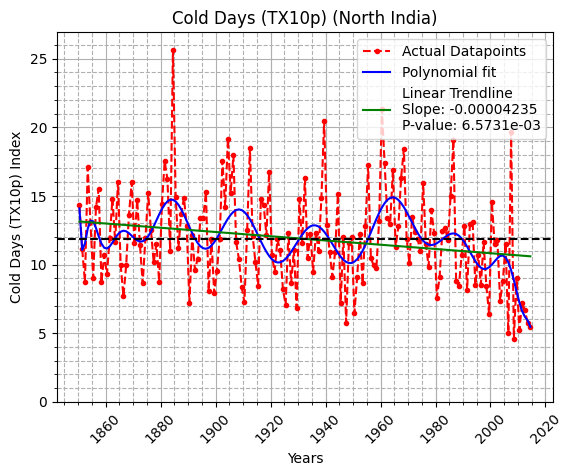

In [78]:
## Timeseries data for North India

tx10p_north_india = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.north_india.nc')
tx10p_north_india = tx10p_north_india['tx10pETCCDI']
tx10p_north_india

## taking mean along the lat and lon axis so that I am only left with timeseries data 

tx10p_north_india_fldmean = tx10p_north_india.mean(dim=['lat','lon'])
tx10p_north_india_fldmean

import pandas as pd
data_mean = tx10p_north_india_fldmean.mean().item()
data_std = tx10p_north_india_fldmean.std().item()

x = date2num(tx10p_north_india_fldmean['time'].values)

tx10p_north_india_fldmean['time'] = tx10p_north_india_fldmean.indexes['time'].to_datetimeindex()

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, tx10p_north_india_fldmean, 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = tx10p_north_india_fldmean.max()

from scipy.stats import linregress

# Fit a linear trend to the original data
slope, intercept, r_value, p_value, std_err = linregress(x, tx10p_north_india_fldmean)

# Evaluate the linear trendline at each data point
linear_trendline = slope * x + intercept

fig, ax = plt.subplots()

ax.plot(tx10p_north_india_fldmean['time'], tx10p_north_india_fldmean, 'r.--', label='Actual Datapoints')
ax.plot(tx10p_north_india_fldmean['time'], trendline, 'b-', label=f'Polynomial fit')
ax.plot(tx10p_north_india_fldmean['time'], linear_trendline, 'g-', label=f'Linear Trendline\nSlope: {slope:.8f}\nP-value: {p_value:.4e}')
ax.axhline(y=data_mean, color='black', linestyle='--')
ax.bar(tx10p_north_india_fldmean['time'], [max_height]*len(tx10p_north_india_fldmean), alpha=0.3, width=1)

ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p) (North India)')
ax.legend(loc='upper right')
# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

plt.show()





/tmp/ipykernel_51967/2641921774.py:18: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tx10p_central_india_fldmean['time'] = tx10p_central_india_fldmean.indexes['time'].to_datetimeindex()


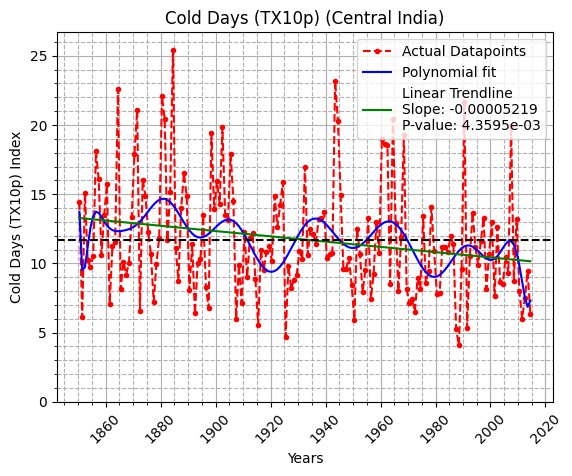

In [73]:
## Timeseries data for Central India

tx10p_central_india = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.central_india.nc')
tx10p_central_india = tx10p_central_india['tx10pETCCDI']
tx10p_central_india

## taking mean along the lat and lon axis so that I am only left with timeseries data 

tx10p_central_india_fldmean = tx10p_central_india.mean(dim=['lat','lon'])
tx10p_central_india_fldmean

import pandas as pd
data_mean = tx10p_central_india_fldmean.mean().item()
data_std = tx10p_central_india_fldmean.std().item()

x = date2num(tx10p_central_india_fldmean['time'].values)

tx10p_central_india_fldmean['time'] = tx10p_central_india_fldmean.indexes['time'].to_datetimeindex()

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, tx10p_central_india_fldmean, 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = tx10p_central_india_fldmean.max()
from scipy.stats import linregress

# Fit a linear trend to the original data
slope, intercept, r_value, p_value, std_err = linregress(x, tx10p_central_india_fldmean)

# Evaluate the linear trendline at each data point
linear_trendline = slope * x + intercept

fig, ax = plt.subplots()

ax.plot(tx10p_central_india_fldmean['time'], tx10p_central_india_fldmean, 'r.--', label='Actual Datapoints')
ax.plot(tx10p_central_india_fldmean['time'], trendline, 'b-', label=f'Polynomial fit')
ax.plot(tx10p_central_india_fldmean['time'], linear_trendline, 'g-', label=f'Linear Trendline\nSlope: {slope:.8f}\nP-value: {p_value:.4e}')
ax.axhline(y=data_mean, color='black', linestyle='--')
ax.bar(tx10p_central_india_fldmean['time'], [max_height]*len(tx10p_central_india_fldmean), alpha=0.3, width=1)


ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p) (Central India)')
ax.legend()
# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

plt.show()




/tmp/ipykernel_51967/2567595957.py:18: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tx10p_west_india_fldmean['time'] = tx10p_west_india_fldmean.indexes['time'].to_datetimeindex()


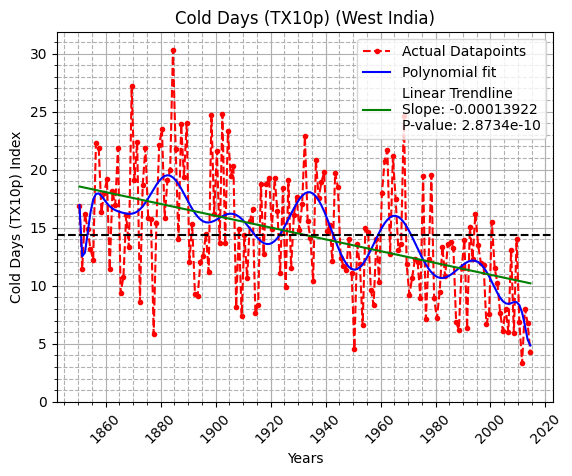

In [74]:
# Timeseries for west India

tx10p_west_india = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.west_india.nc')
tx10p_west_india = tx10p_west_india['tx10pETCCDI']
tx10p_west_india

## taking mean along the lat and lon axis so that I am only left with timeseries data 

tx10p_west_india_fldmean = tx10p_west_india.mean(dim=['lat','lon'])
tx10p_west_india_fldmean

import pandas as pd
data_mean = tx10p_west_india_fldmean.mean().item()
data_std = tx10p_west_india_fldmean.std().item()

x = date2num(tx10p_west_india_fldmean['time'].values)

tx10p_west_india_fldmean['time'] = tx10p_west_india_fldmean.indexes['time'].to_datetimeindex()

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, tx10p_west_india_fldmean, 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = tx10p_west_india_fldmean.max()
from scipy.stats import linregress

# Fit a linear trend to the original data
slope, intercept, r_value, p_value, std_err = linregress(x, tx10p_west_india_fldmean)

# Evaluate the linear trendline at each data point
linear_trendline = slope * x + intercept

fig, ax = plt.subplots()

ax.plot(tx10p_west_india_fldmean['time'], tx10p_west_india_fldmean, 'r.--', label='Actual Datapoints')
ax.plot(tx10p_west_india_fldmean['time'], trendline, 'b-', label=f'Polynomial fit')
ax.plot(tx10p_west_india_fldmean['time'], linear_trendline, 'g-', label=f'Linear Trendline\nSlope: {slope:.8f}\nP-value: {p_value:.4e}')
ax.axhline(y=data_mean, color='black', linestyle='--')
ax.bar(tx10p_west_india_fldmean['time'], [max_height]*len(tx10p_west_india_fldmean), alpha=0.3, width=1)


ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p) (West India)')
ax.legend()
# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

plt.show()


/tmp/ipykernel_51967/2644793532.py:18: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tx10p_east_india_fldmean['time'] = tx10p_east_india_fldmean.indexes['time'].to_datetimeindex()


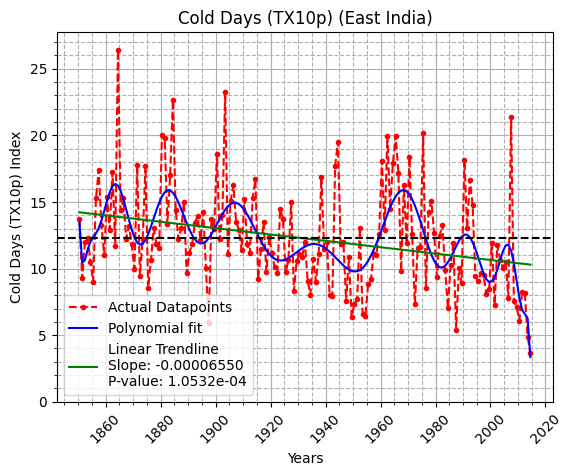

In [75]:
# Timeseries for east India

tx10p_east_india = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.east_india.nc')
tx10p_east_india = tx10p_east_india['tx10pETCCDI']
tx10p_east_india

## taking mean along the lat and lon axis so that I am only left with timeseries data 

tx10p_east_india_fldmean = tx10p_east_india.mean(dim=['lat','lon'])
tx10p_east_india_fldmean

import pandas as pd
data_mean = tx10p_east_india_fldmean.mean().item()
data_std = tx10p_east_india_fldmean.std().item()

x = date2num(tx10p_east_india_fldmean['time'].values)

tx10p_east_india_fldmean['time'] = tx10p_east_india_fldmean.indexes['time'].to_datetimeindex()

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, tx10p_east_india_fldmean, 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = tx10p_east_india_fldmean.max()
from scipy.stats import linregress

# Fit a linear trend to the original data
slope, intercept, r_value, p_value, std_err = linregress(x, tx10p_east_india_fldmean)

# Evaluate the linear trendline at each data point
linear_trendline = slope * x + intercept

fig, ax = plt.subplots()

ax.plot(tx10p_east_india_fldmean['time'], tx10p_east_india_fldmean, 'r.--', label='Actual Datapoints')
ax.plot(tx10p_east_india_fldmean['time'], trendline, 'b-', label=f'Polynomial fit')
ax.plot(tx10p_east_india_fldmean['time'], linear_trendline, 'g-', label=f'Linear Trendline\nSlope: {slope:.8f}\nP-value: {p_value:.4e}')
ax.axhline(y=data_mean, color='black', linestyle='--')
ax.bar(tx10p_east_india_fldmean['time'], [max_height]*len(tx10p_east_india_fldmean), alpha=0.3, width=1)

ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p) (East India)')
ax.legend()
# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

plt.show()


/tmp/ipykernel_51967/4182665904.py:18: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tx10p_south_india_fldmean['time'] = tx10p_south_india_fldmean.indexes['time'].to_datetimeindex()


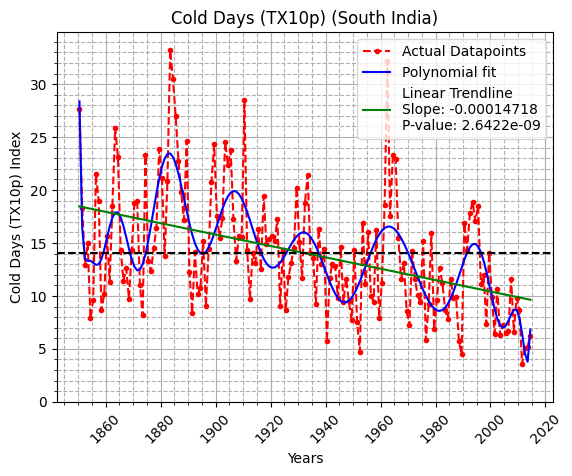

In [76]:
# Timeseries for south India

tx10p_south_india = xr.open_dataset('/home/shiv/Documents/GitHub/EES405/assignment_4/datasets/tx10p.south_india.nc')
tx10p_south_india = tx10p_south_india['tx10pETCCDI']
tx10p_south_india

## taking mean along the lat and lon axis so that I am only left with timeseries data 

tx10p_south_india_fldmean = tx10p_south_india.mean(dim=['lat','lon'])
tx10p_south_india_fldmean

import pandas as pd
data_mean = tx10p_south_india_fldmean.mean().item()
data_std = tx10p_south_india_fldmean.std().item()

x = date2num(tx10p_south_india_fldmean['time'].values)

tx10p_south_india_fldmean['time'] = tx10p_south_india_fldmean.indexes['time'].to_datetimeindex()

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, tx10p_south_india_fldmean, 21)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = tx10p_south_india_fldmean.max()
from scipy.stats import linregress

# Fit a linear trend to the original data
slope, intercept, r_value, p_value, std_err = linregress(x, tx10p_south_india_fldmean)

# Evaluate the linear trendline at each data point
linear_trendline = slope * x + intercept

fig, ax = plt.subplots()

ax.plot(tx10p_south_india_fldmean['time'], tx10p_south_india_fldmean, 'r.--', label='Actual Datapoints')
ax.plot(tx10p_south_india_fldmean['time'], trendline, 'b-', label=f'Polynomial fit')
ax.plot(tx10p_south_india_fldmean['time'], linear_trendline, 'g-', label=f'Linear Trendline\nSlope: {slope:.8f}\nP-value: {p_value:.4e}')
ax.axhline(y=data_mean, color='black', linestyle='--')
ax.bar(tx10p_south_india_fldmean['time'], [max_height]*len(tx10p_south_india_fldmean), alpha=0.3, width=1)

ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p) (South India)')
ax.legend()
# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

plt.show()
